#Final exam answer

Hello, this is our group's member:
1. Nguyễn Võ Khánh Đoan - 2015535098
2. Lê Ánh Phương - 2015536205
3. Nguyễn Hoàng Đan Vy - 2015535693


Based on the requirements of Lecturer and our analysis of DataCo's Big Data on Supply Chain, our group will match the requirements to each part of our analysis notebook as following:


*1.Briefly describe your data using descriptive statistics and plots. (2 marks)*

* **[About dataset] section**


*2.Perform a traditional data analysis using a standard econometric method on the data set. Comment on the results. (2 marks)*

* **[Exploratory Data Analysis] & [EDA conclusion] section**


3.Using an AI model to provide an analysis on the data set. The AI model could be based on any Machine Learning or Deep Learning Algorithms (4 marks)
(Note: you need to show your understandings of the model used, the training and forecasting strategies of the AI model. The more details provided; the higher mark awarded) *italicized text*
* Preparation before Machine Learning model: **[Data Preparation] section**
* Model implementation: **[Model building] section**


*4.Compare and contrast the results of the two methods in Questions 2 and 3, which is based on the model predictions. (1 mark)*
* **[Master conclusion & Future work] section**

*5.Present your results in a Jupyter Notebook and in a recorded video clip. (1 mark).*

* Link of video
* Link of notebook: https://colab.research.google.com/drive/1Ag-CZ2e6nC5X1-Nw9gG_Zi-0pqbWgNb_?usp=sharing

#Problem statement
Our dataset is from DataCo Global Company, published on Mendeley Data on 13 March 2019, which allows us to explore Supply Chain activities regarding Provisioning, Production, Sales, Commercial Distribution.

DataCo operates its own supply chain for e-commerce customers who buy its products online. After scrutinizing the dataset, we have found out the problem of DataCo Global Company in lead time delivery between Days for shipping (scheduled) versus Days for shipping (real). To investigate more about the cause and consequences, as well as methods to predict and prevent lateness in lead time, we need to perform certain tasks on data analysis and use machine learning/ deep learning algorithms. As delivery lead time is the utmost important factor to recruit and retend customers when competition among e-commerce platform is fierce, moreover, the company have received a lot of negative feedback against its service level. Particularly, the delivery notification has continuously falsely predicted days of delivery.

For example, the system notifies customer of 3 days delivery, but ended up 5 days delivery. Worse than that are cases when customer have paid premium shipping service but still get late delivery.

We are currently employed by DataCo to investigate their problems through purchase history dataset to find patterns making up the delivery lead time and come up with solutions.

We acknowledge the assumption that in each country, the logistics system is operating similar with each other. Therefore, we will consider other features besides logistical operations. We will perform certain tasks on data analysis and implement some machine learning as follow:

1. Step 1: Perform data cleanning
2. Step 2: Perform Exploratory Data Analysis
3. Step 3: Feature analysis and selection
4. Step 4: Build models to predict number of lead time days and/or whether orders are on-time delivery.
5. Step 5: Solutions roposals


#Set up

**NOTE**

To run the code, please use one of our member's Kaggle API ID:


*   username: phuongleanh
*   key: 96e74059c21793be63479199baa5e3c5

If you run all, the notebook may take up 30 minutes to complete all the code.


In [ ]:
%pip install opendatasets
import opendatasets as od
od.download("https://www.kaggle.com/datasets/shashwatwork/dataco-smart-supply-chain-for-big-data-analysis?select=DataCoSupplyChainDataset.csv")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: phuongleanh
Your Kaggle Key: ··········


100%|██████████| 25.7M/25.7M [00:00<00:00, 68.6MB/s]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import pandas as pd
data = pd.read_csv("/content/dataco-smart-supply-chain-for-big-data-analysis/DataCoSupplyChainDataset.csv",encoding="latin-1")

#About dataset

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 53 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Type                           180519 non-null  object 
 1   Days for shipping (real)       180519 non-null  int64  
 2   Days for shipment (scheduled)  180519 non-null  int64  
 3   Benefit per order              180519 non-null  float64
 4   Sales per customer             180519 non-null  float64
 5   Delivery Status                180519 non-null  object 
 6   Late_delivery_risk             180519 non-null  int64  
 7   Category Id                    180519 non-null  int64  
 8   Category Name                  180519 non-null  object 
 9   Customer City                  180519 non-null  object 
 10  Customer Country               180519 non-null  object 
 11  Customer Email                 180519 non-null  object 
 12  Customer Fname                

In [ ]:
data.head()

Type  Days for shipping (real)  Days for shipment (scheduled)  \
0     DEBIT                         3                              4   
1  TRANSFER                         5                              4   
2      CASH                         4                              4   
3     DEBIT                         3                              4   
4   PAYMENT                         2                              4   

   Benefit per order  Sales per customer   Delivery Status  \
0          91.250000          314.640015  Advance shipping   
1        -249.089996          311.359985     Late delivery   
2        -247.779999          309.720001  Shipping on time   
3          22.860001          304.809998  Advance shipping   
4         134.210007          298.250000  Advance shipping   

   Late_delivery_risk  Category Id   Category Name Customer City  ...  \
0                   0           73  Sporting Goods        Caguas  ...   
1                   1           73  Sporting Goods        Caguas  ...   
2                   0           73  Sporting Goods      San Jose  ...   
3                   0           73  Sporting Goods   Los Angeles  ...   
4                   0           73  Sporting Goods        Caguas  ...   

  Order Zipcode Product Card Id Product Category Id  Product Description  \
0           NaN            1360                  73                  NaN   
1           NaN            1360                  73                  NaN   
2           NaN            1360                  73                  NaN   
3           NaN            1360                  73                  NaN   
4           NaN            1360                  73                  NaN   

                                  Product Image  Product Name Product Price  \
0  http://images.acmesports.sports/Smart+watch   Smart watch         327.75   
1  http://images.acmesports.sports/Smart+watch   Smart watch         327.75   
2  http://images.acmesports.sports/Smart+watch   Smart watch         327.75   
3  http://images.acmesports.sports/Smart+watch   Smart watch         327.75   
4  http://images.acmesports.sports/Smart+watch   Smart watch         327.75   

  Product Status shipping date (DateOrders)   Shipping Mode  
0              0             2/3/2018 22:56  Standard Class  
1              0            1/18/2018 12:27  Standard Class  
2              0            1/17/2018 12:06  Standard Class  
3              0            1/16/2018 11:45  Standard Class  
4              0            1/15/2018 11:24  Standard Class  

[5 rows x 53 columns]

##Column removal

In [ ]:
missing_values_count = data.isnull().sum()
columns_with_missing_values = data.columns[missing_values_count > 0]

for column in columns_with_missing_values:
    print(column, missing_values_count[column])

Customer Lname 8
Customer Zipcode 3
Order Zipcode 155679
Product Description 180519


In [ ]:
cols_no_info = data[['Order Profit Per Order','Customer Email', 'Order Id', 'Category Id', 'Department Id', 'Order Zipcode', 'Customer Id', 'Customer Password', 'Customer Email', 'Product Status', 'Order Item Cardprod Id', 'Product Description', 'Customer Lname', 'Customer Zipcode', 'Customer Lname','Customer Fname', 'Customer Zipcode', 'Order Customer Id','Order Item Id','Product Card Id','Product Category Id', 'Product Image','Order Item Product Price']]
cols_no_info.head()

Order Profit Per Order Customer Email  Order Id  Category Id  \
0               91.250000      XXXXXXXXX     77202           73   
1             -249.089996      XXXXXXXXX     75939           73   
2             -247.779999      XXXXXXXXX     75938           73   
3               22.860001      XXXXXXXXX     75937           73   
4              134.210007      XXXXXXXXX     75936           73   

   Department Id  Order Zipcode  Customer Id Customer Password Customer Email  \
0              2            NaN        20755         XXXXXXXXX      XXXXXXXXX   
1              2            NaN        19492         XXXXXXXXX      XXXXXXXXX   
2              2            NaN        19491         XXXXXXXXX      XXXXXXXXX   
3              2            NaN        19490         XXXXXXXXX      XXXXXXXXX   
4              2            NaN        19489         XXXXXXXXX      XXXXXXXXX   

   Product Status  ...  Customer Zipcode  Customer Lname Customer Fname  \
0               0  ...             725.0        Holloway          Cally   
1               0  ...             725.0            Luna          Irene   
2               0  ...           95125.0       Maldonado        Gillian   
3               0  ...           90027.0            Tate           Tana   
4               0  ...             725.0       Hendricks           Orli   

   Customer Zipcode Order Customer Id Order Item Id  Product Card Id  \
0             725.0             20755        180517             1360   
1             725.0             19492        179254             1360   
2           95125.0             19491        179253             1360   
3           90027.0             19490        179252             1360   
4             725.0             19489        179251             1360   

   Product Category Id                                 Product Image  \
0                   73  http://images.acmesports.sports/Smart+watch    
1                   73  http://images.acmesports.sports/Smart+watch    
2                   73  http://images.acmesports.sports/Smart+watch    
3                   73  http://images.acmesports.sports/Smart+watch    
4                   73  http://images.acmesports.sports/Smart+watch    

   Order Item Product Price  
0                    327.75  
1                    327.75  
2                    327.75  
3                    327.75  
4                    327.75  

[5 rows x 23 columns]

**Intepretation**:

We have displayed the dataset in many columns and a few initial rows to quickly examine the column names, data types, and a sample of the values in the dataset. However, we can see that the dataset has many columns containing missing values under the name NaN, which makes it difficult for us to observe and analyze further. After retrieving the columns and rows containing the missing values, we managed to know that data refers to irrelevant information that we do not prefer for later use because those columns contain nothing more than operational information. Therefore, to make our data cleaner, we will drop those columns.

In [ ]:
cols_delete = ['Order Profit Per Order','Customer Email', 'Order Id', 'Category Id', 'Department Id', 'Order Zipcode', 'Customer Id', 'Customer Password', 'Customer Email', 'Product Status', 'Order Item Cardprod Id', 'Product Description', 'Customer Lname', 'Customer Zipcode', 'Customer Lname','Customer Fname', 'Customer Zipcode', 'Order Customer Id','Order Item Id','Product Card Id','Product Category Id', 'Product Image','Order Item Product Price']
data.drop(cols_delete, axis=1, inplace=True)
data.head()

Type  Days for shipping (real)  Days for shipment (scheduled)  \
0     DEBIT                         3                              4   
1  TRANSFER                         5                              4   
2      CASH                         4                              4   
3     DEBIT                         3                              4   
4   PAYMENT                         2                              4   

   Benefit per order  Sales per customer   Delivery Status  \
0          91.250000          314.640015  Advance shipping   
1        -249.089996          311.359985     Late delivery   
2        -247.779999          309.720001  Shipping on time   
3          22.860001          304.809998  Advance shipping   
4         134.210007          298.250000  Advance shipping   

   Late_delivery_risk   Category Name Customer City Customer Country  ...  \
0                   0  Sporting Goods        Caguas      Puerto Rico  ...   
1                   1  Sporting Goods        Caguas      Puerto Rico  ...   
2                   0  Sporting Goods      San Jose          EE. UU.  ...   
3                   0  Sporting Goods   Los Angeles          EE. UU.  ...   
4                   0  Sporting Goods        Caguas      Puerto Rico  ...   

  Order Item Quantity   Sales Order Item Total    Order Region  \
0                   1  327.75       314.640015  Southeast Asia   
1                   1  327.75       311.359985      South Asia   
2                   1  327.75       309.720001      South Asia   
3                   1  327.75       304.809998         Oceania   
4                   1  327.75       298.250000         Oceania   

       Order State     Order Status  Product Name Product Price  \
0  Java Occidental         COMPLETE  Smart watch         327.75   
1         Rajastán          PENDING  Smart watch         327.75   
2         Rajastán           CLOSED  Smart watch         327.75   
3       Queensland         COMPLETE  Smart watch         327.75   
4       Queensland  PENDING_PAYMENT  Smart watch         327.75   

  shipping date (DateOrders)   Shipping Mode  
0             2/3/2018 22:56  Standard Class  
1            1/18/2018 12:27  Standard Class  
2            1/17/2018 12:06  Standard Class  
3            1/16/2018 11:45  Standard Class  
4            1/15/2018 11:24  Standard Class  

[5 rows x 33 columns]

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 33 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Type                           180519 non-null  object 
 1   Days for shipping (real)       180519 non-null  int64  
 2   Days for shipment (scheduled)  180519 non-null  int64  
 3   Benefit per order              180519 non-null  float64
 4   Sales per customer             180519 non-null  float64
 5   Delivery Status                180519 non-null  object 
 6   Late_delivery_risk             180519 non-null  int64  
 7   Category Name                  180519 non-null  object 
 8   Customer City                  180519 non-null  object 
 9   Customer Country               180519 non-null  object 
 10  Customer Segment               180519 non-null  object 
 11  Customer State                 180519 non-null  object 
 12  Customer Street               

**Intepretation:**

Compared to our original data with 53 columns and takes up memory usage: 73.0+ MB, after deleting unuseful columns for our present purpose, our data is now with 33 columns and takes up only 45.4+ MB of memory usage, which is more clean and easy for us to use.

##Descriptive statistics

In [ ]:
categorical_var = ['Type', 'Delivery Status', 'Category Name', 'Customer City', 'Customer Country',
                   'Customer Segment', 'Customer State', 'Customer Street', 'Department Name', 'Market',
                   'Order City', 'Order Country', 'Order Region', 'Order State',
                   'Order Status', 'Product Name', 'Shipping Mode']

In [ ]:
numerical_var =  ['Benefit per order', 'Sales per customer', 'Late_delivery_risk',
                 'Latitude', 'Longitude', 'Order Item Discount', 'Order Item Discount Rate',
                 'Order Item Profit Ratio', 'Order Item Quantity',
                 'Sales', 'Order Item Total', 'Product Price']

In [ ]:
numerical_data = data[numerical_var]
description = numerical_data.describe().T
print(description)

                             count        mean         std          min  \
Benefit per order         180519.0   21.974989  104.433526 -4274.979980   
Sales per customer        180519.0  183.107609  120.043670     7.490000   
Late_delivery_risk        180519.0    0.548291    0.497664     0.000000   
Latitude                  180519.0   29.719955    9.813646   -33.937553   
Longitude                 180519.0  -84.915675   21.433241  -158.025986   
Order Item Discount       180519.0   20.664741   21.800901     0.000000   
Order Item Discount Rate  180519.0    0.101668    0.070415     0.000000   
Order Item Profit Ratio   180519.0    0.120647    0.466796    -2.750000   
Order Item Quantity       180519.0    2.127638    1.453451     1.000000   
Sales                     180519.0  203.772096  132.273077     9.990000   
Order Item Total          180519.0  183.107609  120.043670     7.490000   
Product Price             180519.0  141.232550  139.732492     9.990000   

                        

**Intepretation:**

Benefit per order: This variable has 180,519 data points. The average benefit per order is approximately 21.97, with standard deviation of 104.43. The minimum benefit per order is -4,274.98, which suggests a loss for some orders.

Sales per customer: This variable also has 180,519 data points. The average sales per customer is approximately 183.11, with standard deviation of 120.04. The minimum sales per customer is 7.49.

Late_delivery_risk: This variable has 180,519 data points. It represents a binary value (0 or 1) indicating whether there is a risk of late delivery. The average value is approximately 0.55, suggesting that late delivery is common.

Latitude and Longitude: These variables have 180,519 data points each. They represent the geographical coordinates of a location. The mean latitude is approximately 29.72, with a standard deviation of 9.81. The mean longitude is approximately -84.92, with a standard deviation of 21.43.

Order Item Discount: This variable has 180,519 data points. The average discount per order item is approximately 20.66, with standard deviation of 21.80. The minimum discount is 0, indicating no discount was applied for some items.

Order Item Discount Rate: This variable has 180,519 data points. The average discount rate per order item is approximately 0.10, with standard deviation of 0.07. The minimum discount rate is 0, indicating no discount was applied for some items.

Order Item Profit Ratio: This variable has 180,519 data points. The average profit ratio per order item is approximately 0.12, with standard deviation of 0.47. The minimum profit ratio is -2.75, suggesting some order items resulted in a loss.

Order Item Quantity: This variable has 180,519 data points. The average quantity per order item is approximately 2.13, with a standard deviation of 1.45. The minimum quantity is 1.

Sales: This variable has 180,519 data points. The average sales amount is approximately $203.77, with standard deviation of 132.27. The minimum sales amount is 9.99.

Order Item Total: This variable has 180,519 data points. It represents the total amount per order item, which is the same as the "Sales per customer" variable. So, the mean, standard deviation, and minimum values are the same as the "Sales per customer" variable.

Order Profit Per Order: This variable has 180,519 data points. It represents the profit per order. The mean, standard deviation, and minimum values are the same as the "Benefit per order" variable.

Product Price: This variable has 180,519 data points. The average price per product is approximately $141.23, with standard deviation of 139.73. The minimum price is 9.99.

##Outliers analysis

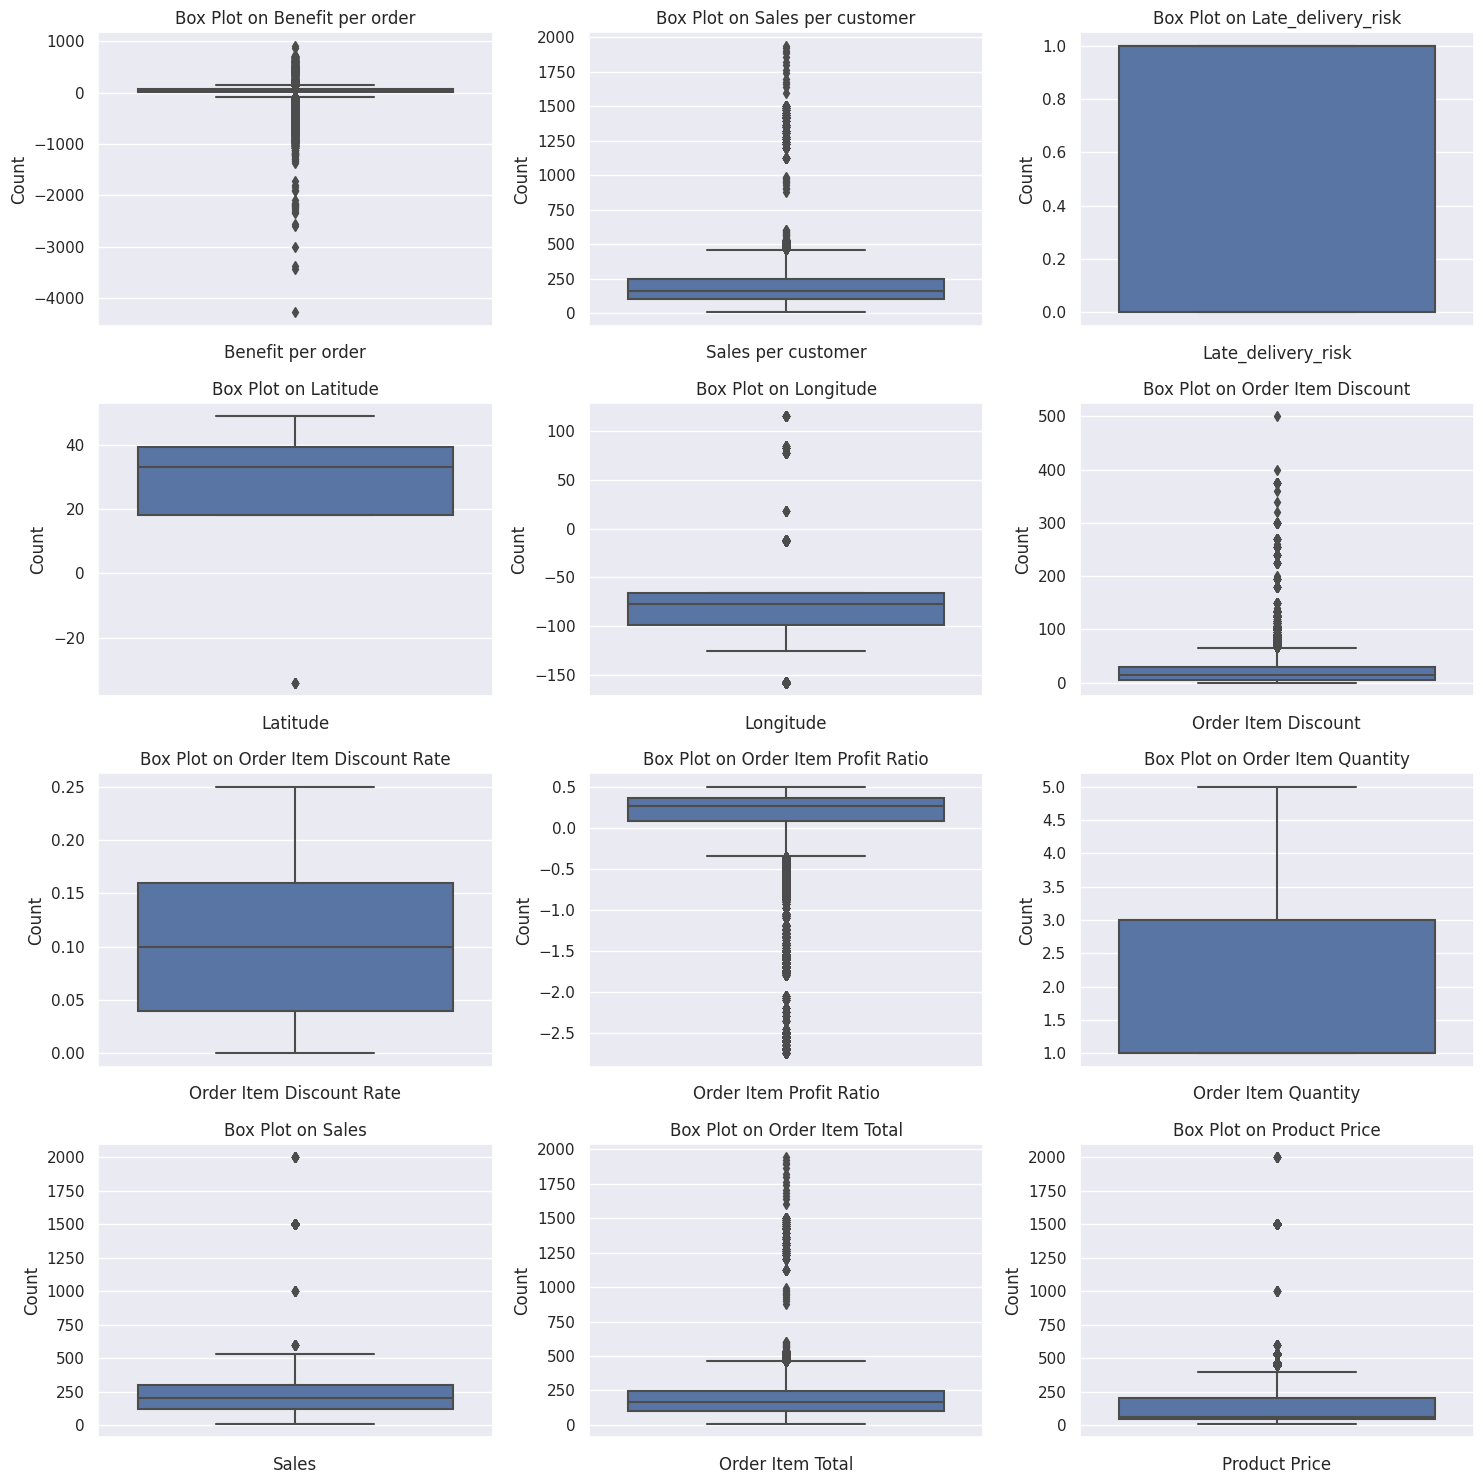

                    Variable  Samples with outliers  Samples without outliers  \
0          Benefit per order                 180519                    161577   
7    Order Item Profit Ratio                 180519                    163219   
5        Order Item Discount                 180519                    172982   
11             Product Price                 180519                    178471   
1         Sales per customer                 180519                    178576   
10          Order Item Total                 180519                    178576   
4                  Longitude                 180519                    179105   
9                      Sales                 180519                    180031   
3                   Latitude                 180519                    180510   
2         Late_delivery_risk                 180519                    180519   
6   Order Item Discount Rate                 180519                    180519   
8        Order Item Quantity

In [ ]:
sns.set(font_scale=1.0)
fig, axes = plt.subplots(nrows=4, ncols=3)
fig.set_size_inches(15, 15)

for i, var in enumerate(numerical_var):
    row = i // 3
    col = i % 3
    sns.boxplot(data=data, y=var, orient="v", ax=axes[row][col])

    axes[row][col].set(xlabel=var, ylabel='Count', title=f"Box Plot on {var}")

plt.tight_layout()
plt.show()

results = []
for var in numerical_var:
    q1 = data[var].quantile(0.25)
    q3 = data[var].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)

    num_with_outliers = len(data)
    num_without_outliers = len(data.loc[(data[var] >= lower_bound) & (data[var] <= upper_bound)])
    num_outliers = num_with_outliers - num_without_outliers

    results.append({
        'Variable': var,
        'Samples with outliers': num_with_outliers,
        'Samples without outliers': num_without_outliers,
        'Outliers': num_outliers
    })

results_df = pd.DataFrame(results)
sorted_results_df = results_df.sort_values(by='Outliers', ascending=False)

print(sorted_results_df)

**Intepretation:**

Among the numerical variables, 'Benefit per order', Order Item Profit Ratio' are the two variables which are highly impacted by outliers (among all data points, approximately 10% are outliers). We need to see the distribution of these varibles before we can make conclusion to remove outliers out of our dataset our not.

For the remaining numerical variables in the list, 'Sales', 'Longitude', 'Order Item Total', 'Sales per customer' is the least impacted by outliers with less than 1% data points are outliers.

For the rest, it seems that no significant number of outliers present in the data.

##Distribution summary

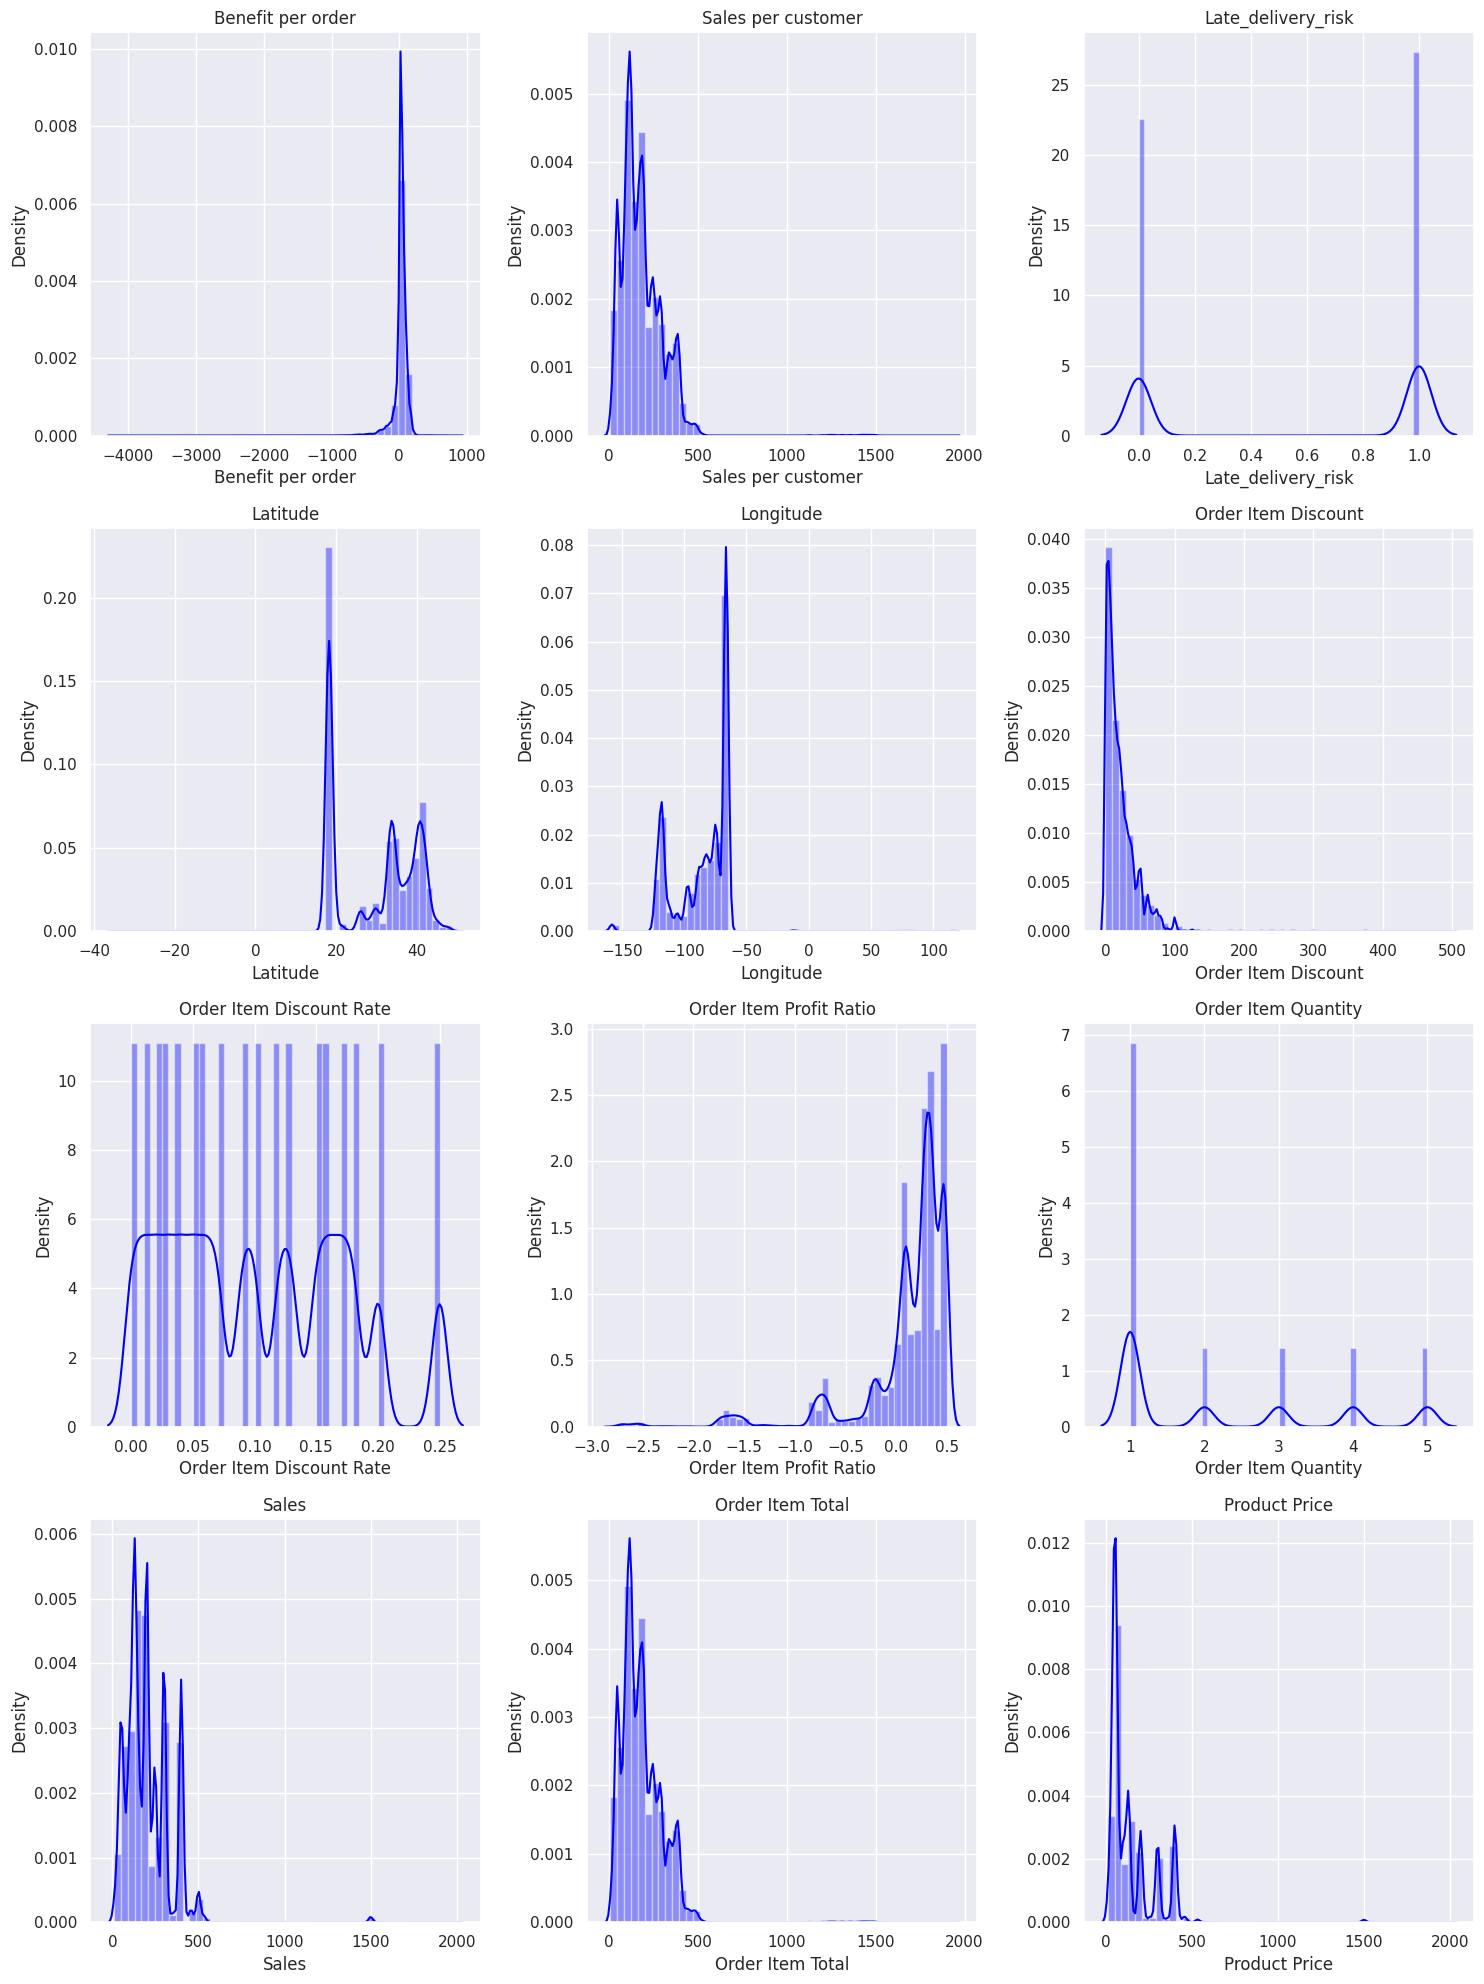

In [ ]:
import warnings
warnings.filterwarnings("ignore")

fig, axes = plt.subplots(5, 3, figsize=(15, 20))
axes = axes.flatten()

for i, var in enumerate(numerical_var):
    ax = axes[i]
    sns.distplot(data[var], bins=50, color='blue', ax=ax)
    ax.set_title(var)

fig.tight_layout()
plt.show()

**Intepretation:**

As we see in the distribution plot, we notice that none of numerical variables follow Gaussian Normal Distribution orignally. But, if we look closely to 'Benefit per order' may follow when outliers are detected and removed. We can assume that the varible may be prone to human data input mistakes. Therefore, before making the 'Benefit per order' our features to train the model, we will note to remove outliers first.

For other numerical variables presented in the distribution plot, 'Sales per customer', 'Order Item Discount', 'Order Item Total', 'Sales', 'Product Price' has a left skewed distribution (concentrate mostly near 0).

##Conclusion
All of the above analysis indicates that **next steps are that** we need either to:
- Transform our numerical data into normal distribution
- Resampling our dataset to make statiscal reference reliable without much impact on which distribution that numerical variables follow
- Regarding our problem stated above in Project Statement part, machine learning models are what we going to do to solve our questions. As our models do not follow any special distribution, we will also consider using decision trees, random forests, or support vector machines for our regression problem.



#Exploratory Data Analysis


##Lead time overview

###Treatment of datetime variables

In [ ]:
data['On-time delivery'] = ((data['Days for shipping (real)'] - data['Days for shipment (scheduled)']) <= 0).astype(int)

In [ ]:
from datetime import datetime, date
data['shipping date (DateOrders)'] = pd.to_datetime(data['shipping date (DateOrders)'])
data['order date (DateOrders)'] = pd.to_datetime(data['order date (DateOrders)'])

data['Lead time delivery'] = (data['shipping date (DateOrders)'] - data['order date (DateOrders)']).dt.days.astype(int)

data['Order weekday'] = data['order date (DateOrders)'].dt.weekday
data['Order month'] = data['order date (DateOrders)'].dt.month
data['Order hour'] = data['order date (DateOrders)'].dt.hour

data['Shipping weekday'] = data['shipping date (DateOrders)'].dt.weekday
data['Shipping month'] = data['shipping date (DateOrders)'].dt.month
data['Shipping hour'] = data['shipping date (DateOrders)'].dt.hour

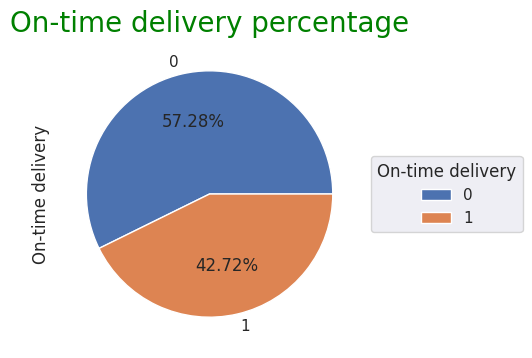

In [ ]:
plt.figure(figsize= (4,4))
fig = data['On-time delivery'].value_counts(normalize = True).plot.pie(autopct='%1.2f%%')
plt.title('On-time delivery percentage', fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
fig.legend(title='On-time delivery', loc="center left",bbox_to_anchor=(1, 0, 0.5, 1))
plt.show()

**Intepretation:**

Regarding the above pie chart, the percentage of on-time delivery accounts for 42.72%, about 15% less than the late and canceled shipments at 57.28%. The on-time delivery percentage is even less than 50% in total, from which we can understand that the logistics services are still insufficient and not yet efficient and effective. The productivity of logistics operations might be low so it is hard to achieve a higher chance of on-time and advanced shipments to customers. Late shipments can result in a higher chance of customer dissatisfaction and other relevant issues unless the rate of that can be decreased.

###Lead time & On-time versus order weekday/hour/month

Text(0.5, 1.0, 'On-time Delivery by hour')

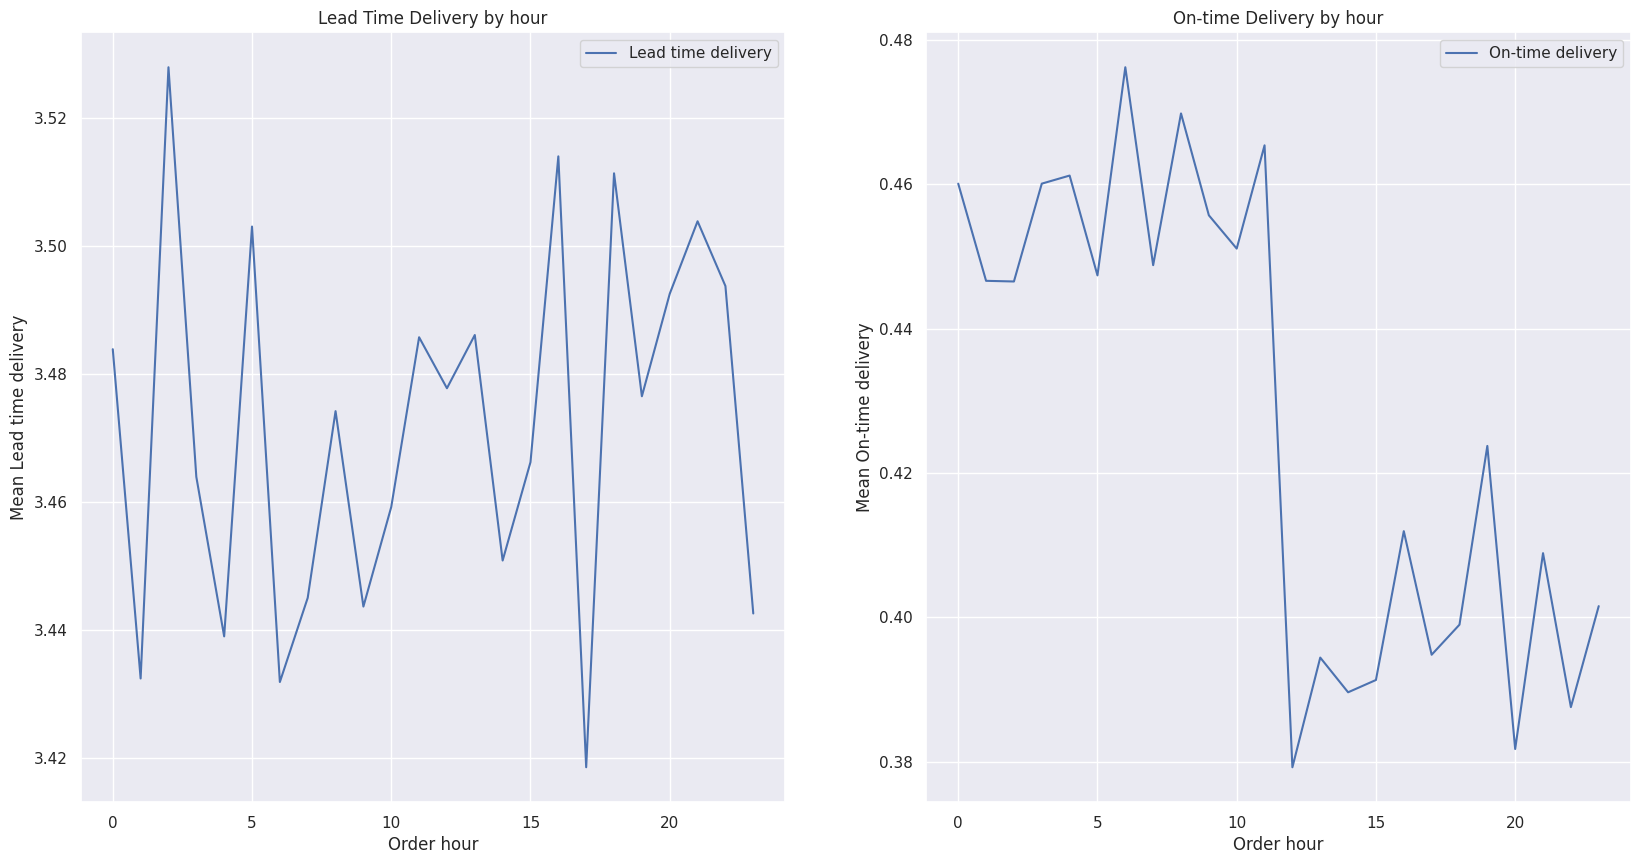

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(20, 10))
data.groupby('Order hour')[['Lead time delivery']].mean().plot(kind='line', ax=axs[0])
axs[0].set_xlabel('Order hour')
axs[0].set_ylabel('Mean Lead time delivery')
axs[0].set_title('Lead Time Delivery by hour')

data.groupby('Order hour')[['On-time delivery']].mean().plot(kind='line', ax=axs[1])
axs[1].set_xlabel('Order hour')
axs[1].set_ylabel('Mean On-time delivery')
axs[1].set_title('On-time Delivery by hour')

**Intepretation:**

The value of mean Lead time delivery fluctuates when grouped together with order hour for calculation and analysis. The lead time delivery value ranges from 3.42 to 3.53 within 24h a day for order placement. There shall not be a specific period of time when order should be placed to decrease the lead time possible, because the order hour with low lead time delivery have many different points scattered at different hours.

The value of on-time delivery is demonstrated with small fluctuations during the time from the hour of 0-10, then decreases sharply from 10-12 and then fluctuates slightly after that. Therefore, the value of on-time delivery shall be higher when order are placed early in the morning till afternoon.

Regarding the hours at which orders are placed, we see the small higher of on-time delivery rate when orders are placed in early morning and drastically dropped down after 10 am. This could be explained by the fact that the logistics hub tends to operate in midnight, and if orders are placed during the high peak of logistics hub, they can be prepared very quick and can be shipped right away after.

Text(0.5, 1.0, 'On-time Delivery by Weekday')

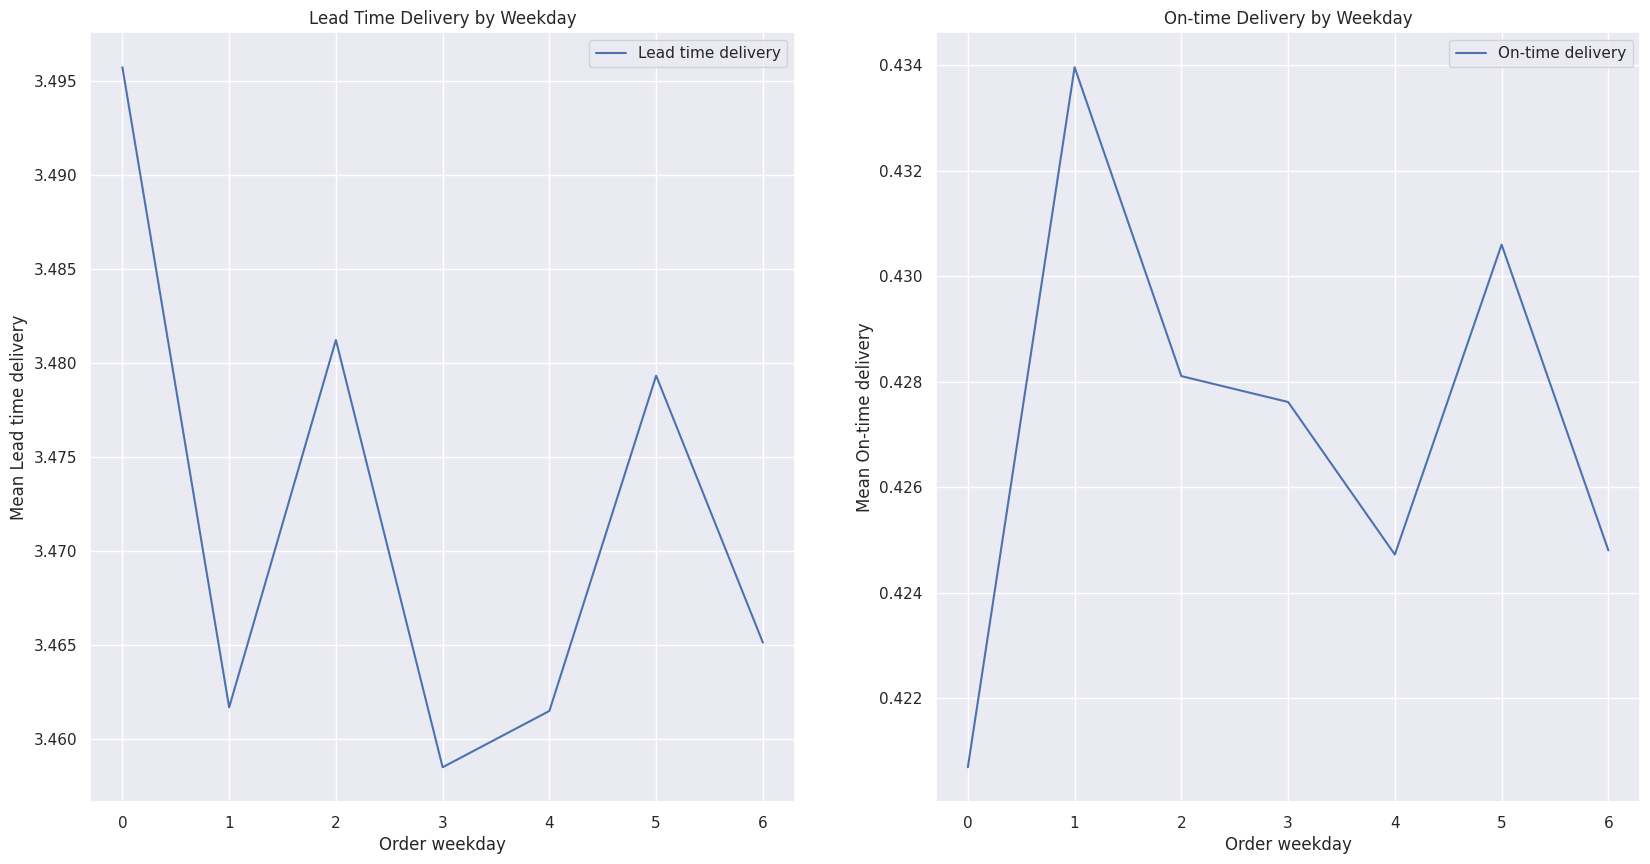

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(20, 10))
data.groupby('Order weekday')[['Lead time delivery']].mean().plot(kind='line', ax=axs[0])
axs[0].set_xlabel('Order weekday')
axs[0].set_ylabel('Mean Lead time delivery')
axs[0].set_title('Lead Time Delivery by Weekday')

data.groupby('Order weekday')[['On-time delivery']].mean().plot(kind='line', ax=axs[1])
axs[1].set_xlabel('Order weekday')
axs[1].set_ylabel('Mean On-time delivery')
axs[1].set_title('On-time Delivery by Weekday')

**Intepretation**:

The Lead Time delivery and On-time Delivery value by weekday fluctuates from Monday to Sunday. The days with a high value of lead time delivery include Monday, Wednesday, and Saturday while the remaining days have a low value. This means the shipping time after order placement by customers will be higher on Monday, Wednesday, and Saturday but it is shorter on the other days of the week.

On the other hand, we can see the different trend of the On-time Delivery value. The value is lower on Monday, Wednesday and Sunday while it is higher on Tuesday, Thursday and Saturday. This means that the delivery shall be on-time or ahead of schedule on Monday, Wednesday and Saturday.

After witnessing the Lead time and On-time Delivery Value by Weekday, we might question whether there might be some correlation between On-time and Lead Time Delivery values.


Text(0.5, 1.0, 'On-time Delivery by month')

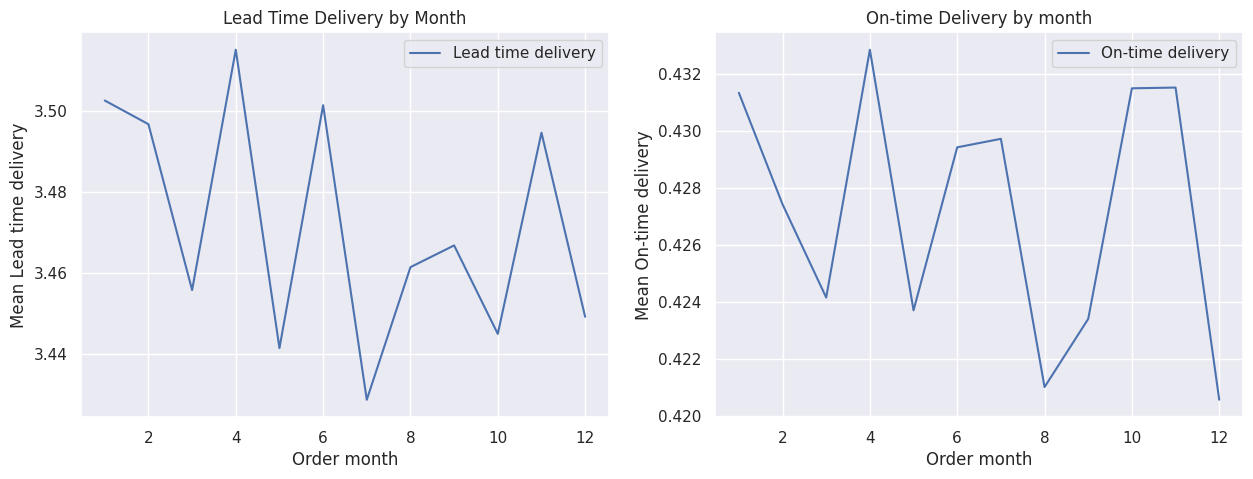

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
data.groupby('Order month')[['Lead time delivery']].mean().plot(kind='line', ax=axs[0])
axs[0].set_xlabel('Order month')
axs[0].set_ylabel('Mean Lead time delivery')
axs[0].set_title('Lead Time Delivery by Month')

data.groupby('Order month')[['On-time delivery']].mean().plot(kind='line', ax=axs[1])
axs[1].set_xlabel('Order month')
axs[1].set_ylabel('Mean On-time delivery')
axs[1].set_title('On-time Delivery by month')

**Intepretation**:

The mean Lead Time Delivery value tends to be higher or the delivery time after order placement takes longer in even months like April, June,... except October and December with the highest value at 3.51 in April.  While the delivery is shorter in March, May,...with the shortest ideal lead time at 3.43 in July, we can understand that it takes a shorter time to make delivery to customers after orders have been placed.


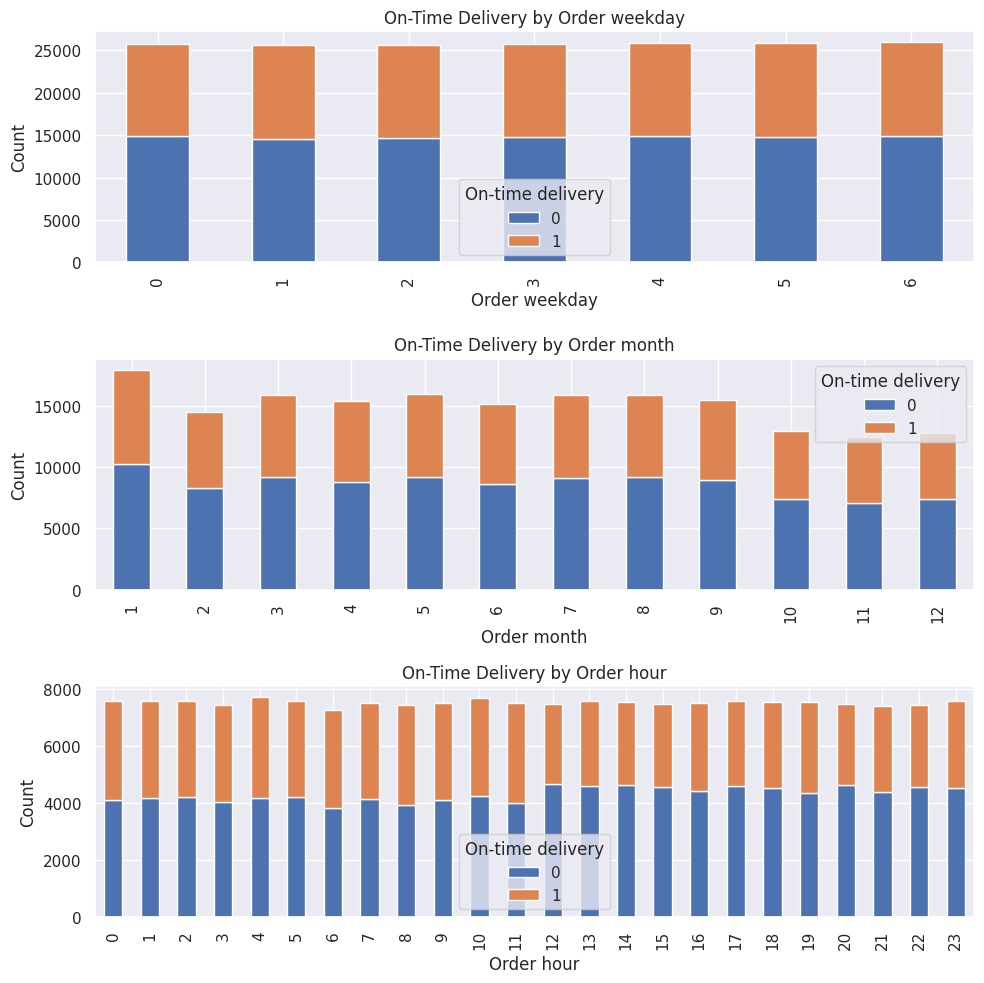

In [ ]:
fig, axes = plt.subplots(len(['Order weekday', 'Order month', 'Order hour']), 1, figsize=(10, 10))

for i, column in enumerate(['Order weekday', 'Order month', 'Order hour']):
    grouped_data = data.groupby([column, 'On-time delivery']).size().unstack()
    ax = axes[i]
    grouped_data.plot(kind='bar', stacked=True, ax=ax)
    ax.set_title(f'On-Time Delivery by {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Count')

plt.tight_layout()
plt.show()

**Interpretation:**

Even when we look at the On-time Delivery Value in correlation with orders by day, month and hour, we can see that late shipments and canceled shipments are partially higher than the value of on-time delivery.   However, the amount of time for late shipments is about 50% to 60% and slightly above with order hour and order weekday compared to order month, whose amount of time for late shipments tends to be remarkably higher than 50% and 60%. Therefore, it can be understood that, when putting the on-time delivery value in correlation with order hour, weekday and month, the more specific we analyse like weekday and hour, the more accurate and objective result we might be able to get.

###Lead time versus On-time rate

Text(0.5, 1.0, 'Number of days for lead time delivery vs On-time delivery rate')

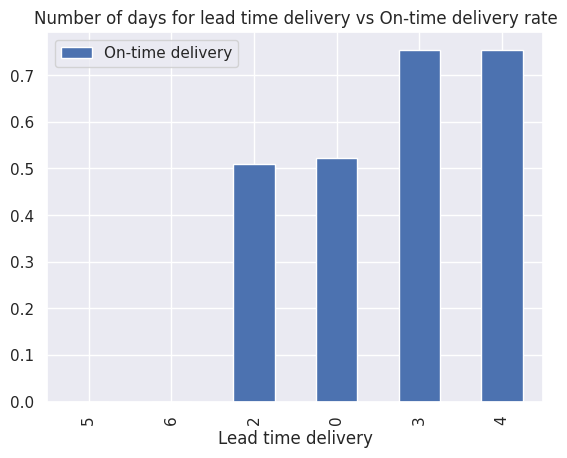

In [ ]:
data.groupby('Lead time delivery')[['On-time delivery']].mean().sort_values(by='On-time delivery', ascending=True).plot(kind='bar')
plt.title('Number of days for lead time delivery vs On-time delivery rate')

**Interpretation**:

Looking at the chart we can see that the on-time delivery rate is higher when there is an increase in the lead time delivery days. So that orders with number of lead time delivery days ranges from (0,4) have higher rate of on-time delivery whereas the longer of lead time delivery (in this graph, it says that if 5 or 6 days delivery are 100% late). This indicates that if orders are projected to have 5 to 6 days of delivery are prone to lateness and a signal for management team to closely follow and monitor.

In [ ]:
data.groupby('Days for shipment (scheduled)')[['On-time delivery']].mean().sort_values(by='On-time delivery', ascending=False)

On-time delivery
Days for shipment (scheduled)                  
4                                      0.602318
0                                      0.521721
2                                      0.202692
1                                      0.000000

**Interpretation:**

Surprisingly, 4-day lead time has the highest rate of on-time delivery, next is within-day lead time and 2-day lead time. However, orders with scheduled delivery lead time are prone to miss the deadlines with 0 on-time delivery rate.

In [ ]:
data.groupby('Days for shipment (scheduled)')[['Lead time delivery']].mean().sort_values(by='Lead time delivery', ascending=True)

Lead time delivery
Days for shipment (scheduled)                    
0                                        0.000000
1                                        2.000000
2                                        3.990828
4                                        3.995907

**Interpretation:**

As expected, within day shipment has the mean value of 0 for lead time delivery.
However, the mean lead time for 1-day, 2-day, 4-day delivery is surprising 1 day higher than it was scheduled.
We will take this into consideration when proposing our solutions to minimize the positive difference (>0 difference) between scheduled days for shipment and lead time delivery.

##Shipping mode & Lead time

In [ ]:
data.groupby('Shipping Mode')[['Lead time delivery', 'On-time delivery']].mean().sort_values(by='On-time delivery', ascending=False)

Lead time delivery  On-time delivery
Shipping Mode                                       
Standard Class            3.995907          0.602318
Same Day                  0.000000          0.521721
Second Class              3.990828          0.202692
First Class               2.000000          0.000000

Text(0.5, 1.0, 'Days of delivery versus On-time rate of Different type of Shipping Mode')

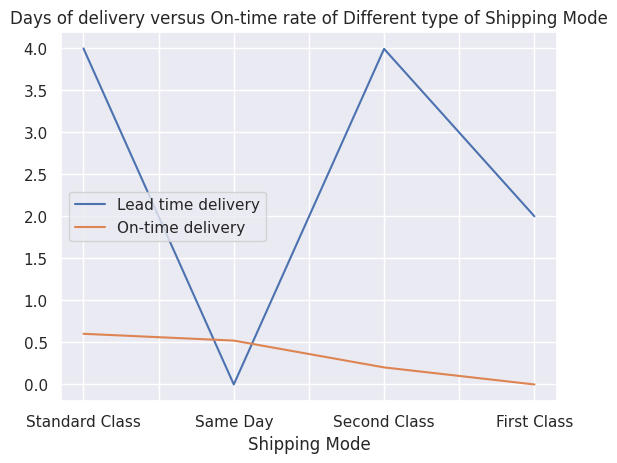

In [ ]:
data.groupby('Shipping Mode')[['Lead time delivery', 'On-time delivery']].mean().sort_values(by='On-time delivery', ascending=False).plot(kind='line')
plt.title('Days of delivery versus On-time rate of Different type of Shipping Mode')

**Interpretation**:

Regarding the shipping mode, the Standard Class can provide effective logistics services for customers with the highest on-time rate. Although it has the longest time between the shipping and order date, it still manages to reach customers on time. However, it is not the same for the Second Class with the second-highest lead time delivery days but its on-time delivery rate seems to be the lowest. Besides, Shipping on the same day has shortest time to make delivery after order placement (only within a day), but it can also bring about good results with second highest on-time delivery rate.

##Revenue & Lead time

Samples in train set with outliers: 180519
Samples in train set without outliers: 178576


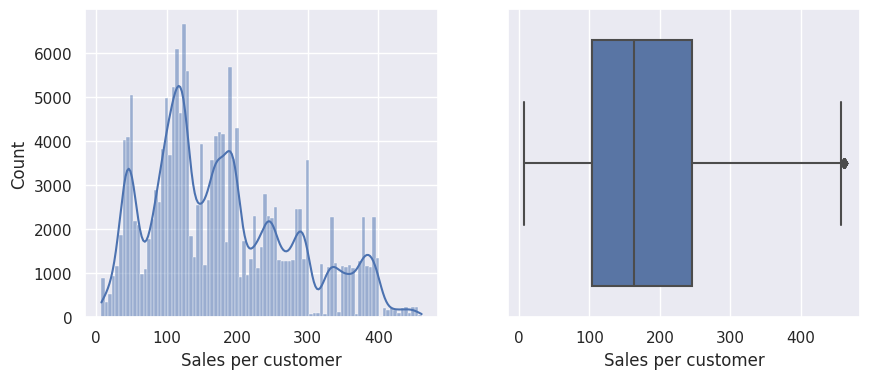

In [ ]:
print("Samples in train set with outliers: {}".format(len(data)))
q1 = data['Sales per customer'].quantile(0.25)
q3 = data['Sales per customer'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 -(1.5 * iqr)
upper_bound = q3 +(1.5 * iqr)

print("Samples in train set without outliers: {}".format(len(data.loc[(data['Sales per customer'] >= lower_bound) & (data['Sales per customer'] <= upper_bound)])))

dts = data.loc[(data['Sales per customer'] >= lower_bound) & (data['Sales per customer'] <= upper_bound)]
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
sns.histplot(dts['Sales per customer'], kde=True)
plt.subplot(1, 2, 2)
sns.boxplot(x=dts['Sales per customer']);

**Intepretation:**

As we see that plotting after outliers removal, we can divide sales per customer into 5 segments, in the range of (0,500,100). For each sement, we want to know the mean of delivery days and on-time delivery to see which Revenue segment has the lowest days of delivery and highest rate of on-time delivery.

In [ ]:
data['Revenue segment'] = pd.cut(data['Sales per customer'], bins=list(range(0,501,100)), labels = ['<100','100-200','200-300','300-400','>400'])

In [ ]:
data.groupby('Revenue segment')[['Lead time delivery']].mean().sort_values(by='Lead time delivery', ascending=True)

Lead time delivery
Revenue segment                    
100-200                    3.469495
200-300                    3.470074
<100                       3.472556
>400                       3.475806
300-400                    3.478235

In [ ]:
data.groupby('Revenue segment')[['On-time delivery']].mean().sort_values(by='On-time delivery', ascending=False)

On-time delivery
Revenue segment                  
200-300                  0.429035
300-400                  0.428243
100-200                  0.427824
<100                     0.423890
>400                     0.421216

**Intepretation:**

It seems like 'Lead time delivery' and 'On-time delivery' rate of revenue segment is kinda consitently with each other despite minor difference. For example, segment of revenue '200-300' has the second lowest number of delivery days but the highest on-time rate. While surprisingly, revenue segment of '300-400' has the longest period for delivery but is the second highest on-time.

This indicates that we should, in practice, explore more of the orders whose revenue in range of '300-400' to discover characteristics that enable them to reach customers so much on-time despite long interval of delivery.

##Profit & Lead time

Samples in train set with outliers: 180519
Samples in train set without outliers: 161577


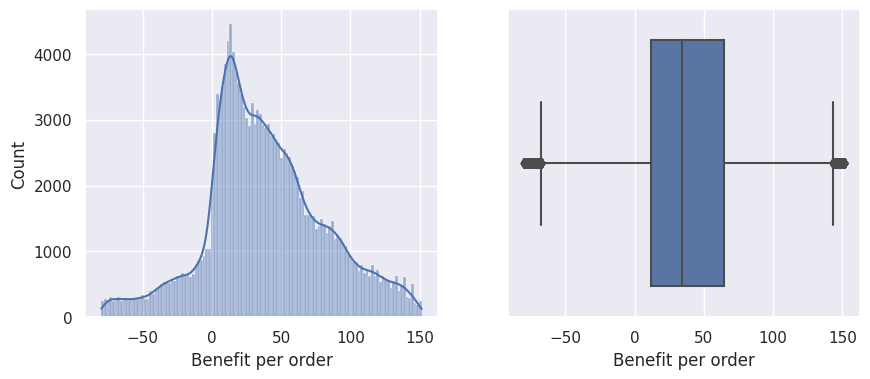

In [ ]:
print("Samples in train set with outliers: {}".format(len(data)))
q1 = data['Benefit per order'].quantile(0.25)
q3 = data['Benefit per order'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 -(1.5 * iqr)
upper_bound = q3 +(1.5 * iqr)

data1 = data.loc[(data['Benefit per order'] >= lower_bound) & (data['Benefit per order'] <= upper_bound)]
print("Samples in train set without outliers: {}".format(len(data1)))

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
sns.histplot(data1['Benefit per order'], kde=True)
plt.subplot(1, 2, 2)
sns.boxplot(x=data1['Benefit per order']);

Intepretation:

From the distribution plot, we can segment Benefit per order in 5 main segments: <-50, from -50 to 0, from 0 to 50, from 50 to 100, from 100 to 150 for further analysis, similar to what we have done in the EDA of Revenue.

In [ ]:
data['Profit segment'] = pd.cut(data['Benefit per order'], bins=list(range(-100,151,50)), labels = ['<-50', '-50 -- 0', '0 -- 50', '50 -- 100', '100 -- 150'])

In [ ]:
data.groupby('Profit segment')[['Lead time delivery']].mean().sort_values(by='Lead time delivery', ascending=True)

Lead time delivery
Profit segment                    
<-50                      3.446967
100 -- 150                3.458439
0 -- 50                   3.463502
50 -- 100                 3.479396
-50 -- 0                  3.488347

In [ ]:
data.groupby('Profit segment')[['On-time delivery']].mean().sort_values(by='On-time delivery', ascending=False)

On-time delivery
Profit segment                  
100 -- 150              0.434212
-50 -- 0                0.428496
50 -- 100               0.427432
0 -- 50                 0.426731
<-50                    0.417729

**Intepretation:**

Like the Revenue segment, the 'Lead time delivery' and 'On-time delivery' rate of the Profit segment is kinda consistent with each other despite minor differences. The profit segment ‘100 – 150’ has the second-lowest value of lead time delivery but it has the highest value of on-time delivery. Meanwhile, the profit segment of ‘- 50 – 0’ has the highest value of lead time delivery and it still maintains the second-highest value of on-time delivery.
We can indicate that whether lead time delivery is high or low, there are cases where on-time delivery rates are still high and the delivery performance is still good.


##Payment term & Lead time

Text(0.5, 1.0, 'Number of order per payment type')

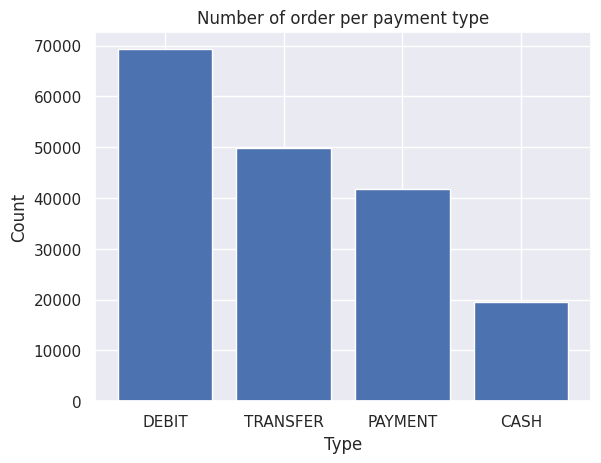

In [ ]:
plt.bar(x=data['Type'].value_counts().index, height=data['Type'].value_counts().values)
plt.xlabel('Type')
plt.ylabel('Count')
plt.title('Number of order per payment type')

**Intepretation:**

There are 4 types of payment and the payment type with the highest orders is Debit and with the lowest orders is Cash. The highest number of orders can nearly reach 70,000 while the lowest one accounts for around 20,000 orders.

Text(0.5, 1.0, 'On-time delivery rate versus Types')

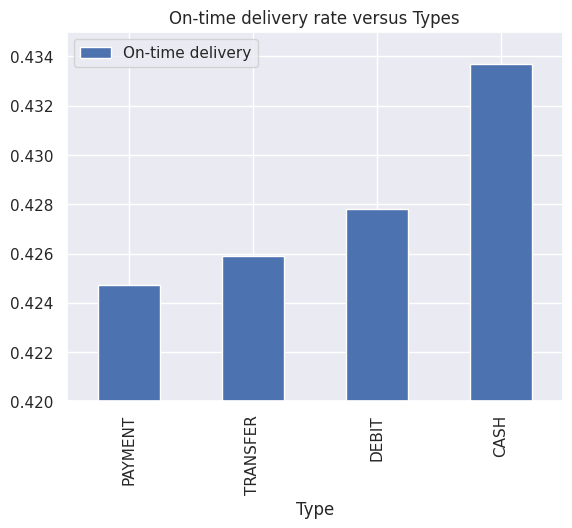

In [ ]:
data.groupby('Type')[['On-time delivery']].mean().sort_values(by='On-time delivery', ascending=True).plot(kind='bar').set_ylim(0.42,0.435)
plt.title('On-time delivery rate versus Types')

**Intepretation:**

The highest on-time delivery rate is paired with the Cash payment method and the second highest one is with the Debit method. However, the Cash method has the lowest orders while Debit has the highest ones. On the other side, the payment method has the lowest rate of on-time delivery.
From these charts, it can be seen that maybe whatever the payment method, it will not clearly state its relationship with the rate of on-time delivery.

Text(0.5, 1.0, 'Lead time delivery versus Type')

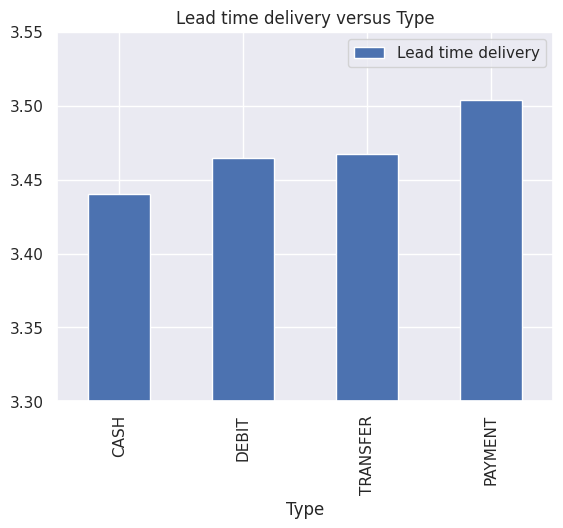

In [ ]:
data.groupby('Type')[['Lead time delivery']].mean().sort_values(by='Lead time delivery', ascending=True).plot(kind='bar').set_ylim(3.3,3.55)
plt.title('Lead time delivery versus Type')

**Intepretation:**

From the chart, the Cash method has the lowest lead time delivery value while the Payment method has the highest value, which is the opposite of the on-time delivery rate. Likewise, the lead time value and on-time delivery rate of the Debit and Transfer method are also opposite. From here, it can be seen that there are reverse correlation between lead time delivery value and on-time delivery rate among different payment methods.

##Geography & Lead time

###Country

In [ ]:
data['Order Country'].nunique()

164

In [ ]:
data.groupby('Order Country')[['Sales per customer','Benefit per order']].sum().sort_values(by='Benefit per order', ascending=False).head(20)

Sales per customer  Benefit per order
Order Country                                              
Estados Unidos              4.385242e+06      540413.070422
Francia                     2.590323e+06      327828.580099
México                      2.368426e+06      303278.370637
Alemania                    1.862578e+06      194827.080381
Brasil                      1.433101e+06      186713.640355
Reino Unido                 1.450047e+06      180942.880424
Australia                   1.521410e+06      170041.580432
China                       1.052753e+06      122190.920525
Italia                      9.638303e+05      121545.470087
India                       8.659689e+05       99746.819972
España                      7.629065e+05       93547.639826
Indonesia                   7.611633e+05       90714.079721
Honduras                    6.611686e+05       85173.809995
República Dominicana        6.527498e+05       84401.019917
El Salvador                 6.723923e+05       77051.909965
Turquía                     5.998727e+05       70910.659854
Nicaragua                   5.441221e+05       66033.600079
Cuba                        6.365173e+05       60624.030139
Nigeria                     4.090323e+05       53436.540101
Filipinas                   3.786269e+05       47687.919908

In [ ]:
data.groupby('Order Country')[['On-time delivery']].mean().sort_values(by='On-time delivery', ascending=False).head(20)

On-time delivery
Order Country                     
Kuwait                    1.000000
Baréin                    1.000000
Burundi                   1.000000
Chad                      1.000000
Omán                      1.000000
Surinam                   1.000000
Serbia                    1.000000
Burkina Faso              0.909091
Macedonia                 0.833333
Líbano                    0.700000
Guayana Francesa          0.666667
Taiwán                    0.655172
Etiopía                   0.640000
Mauritania                0.619048
Togo                      0.614754
Kirguistán                0.612245
Guadalupe                 0.611111
Hong Kong                 0.589041
Guinea                    0.577778
Grecia                    0.571429

**Intepretation:**

Among 164 countries having made orders, we retrieve specifically the top 20 countries, whose sales per customer and benefit per order are the greatest. The highest sales per customer are observed in Estados Unidos (United States) at 4,385,242, followed by Francia (France), México (Mexico), and Alemania (Germany) and lower to 378,626.9 (Philippines). This indicates that customers from these countries tend to have higher sales volumes on average. Similar to the sales per customer, the countries mentioned above have relatively high benefit values with the highest benefit per order at 540,413.07 in the United States, followed by others. This suggests that orders from these countries are significant contributors, they have higher sales volumes and generate higher profits on average. These countries seem to have a strong customer base and profitable order transactions

However, the top 20 retrieved countries with the highest on-time delivery rate totally exclude the top 20 countries with the highest sales per customer and benefit per order. The top highest rates range from 0.571429 to 1,0 and the countries with the supreme good performance of delivery services are Kuwait, Baréin, Burundi, Chad, Omán, Surinam, and Serbia at 1,0, followed by other countries.

Therefore, we can understand that countries with the highest on-time delivery might not be the countries that can generate the greatest sales and benefits.

###Region

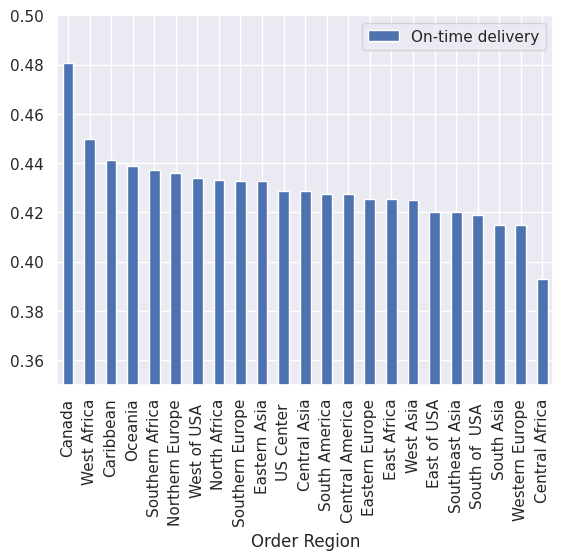

In [ ]:
data.groupby('Order Region')[['On-time delivery']].mean().sort_values(by='On-time delivery', ascending=False).plot(kind='bar').set_ylim(0.35, 0.5)
plt.show()

**Intepretation:**

164 countries are divided into 23 regions, each of which has its own on-time delivery ratio. The ratios are demonstrated by the bar chart above in the descending order.

The rate of Canada order region is 0.48, the highest among order regions while that of Central Africa reaches the lowest rate of 0.39.

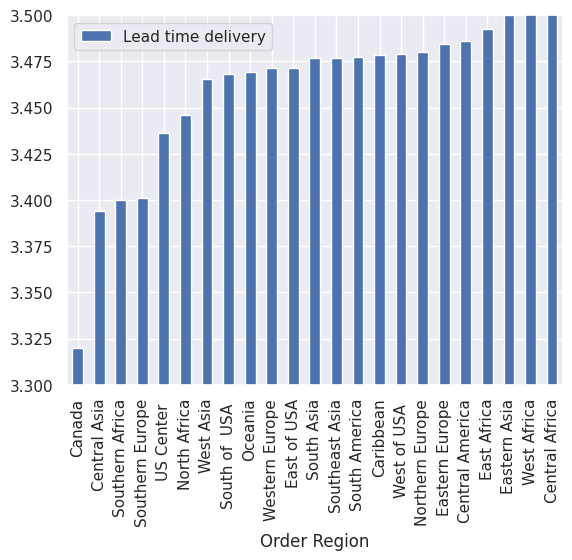

In [ ]:
data.groupby('Order Region')[['Lead time delivery']].mean().sort_values(by='Lead time delivery', ascending=True).plot(kind='bar').set_ylim(3.3,3.5)
plt.show()

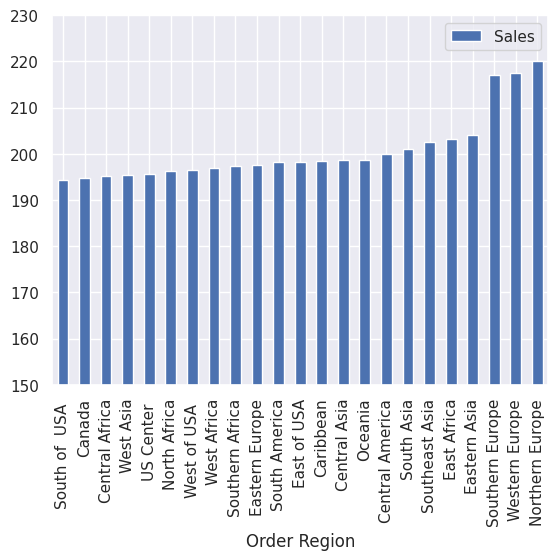

In [ ]:
data.groupby('Order Region')[['Sales']].mean().sort_values(by='Sales', ascending=True).plot(kind='bar').set_ylim(150,230)
plt.show()

**Intepretation:**

The fact that a region that has the higher on-time delivery rate does not certainly mean it will have the higher figure of sales.

To be more specific, Western Europe ranks as the second highest in sales figures, but its on-time delivery rate is the second lowest among the regions.

However, witnessing the opposite tendency, Canada region has the highest rate of on-time delivery, but its sales is mostly the smallest number compared to other regions.

###Market

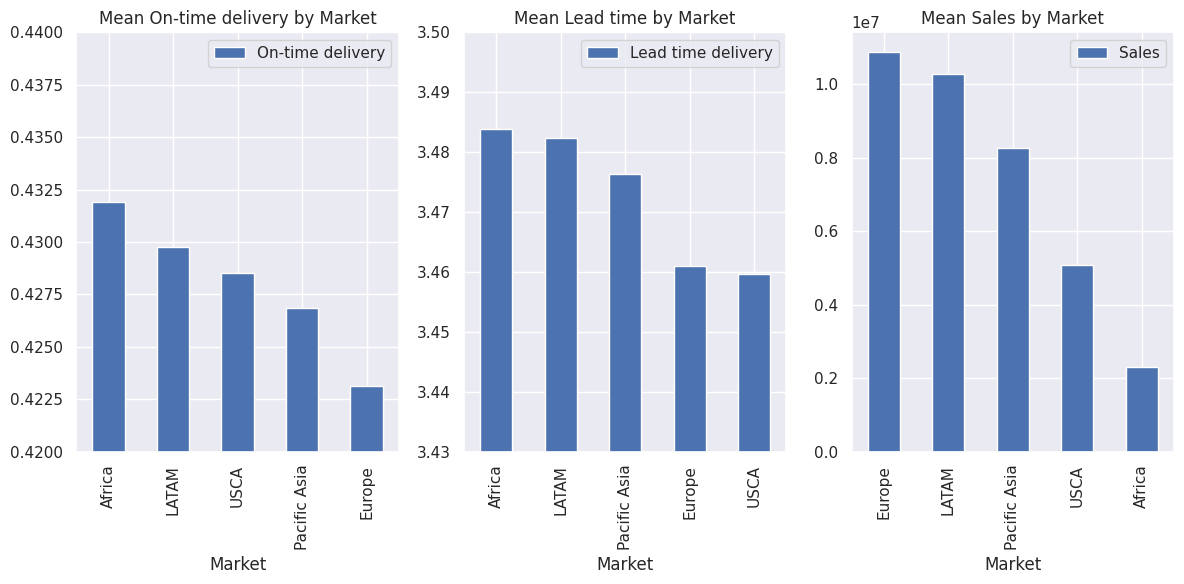

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(12, 6))

axes[0].set_title('Mean On-time delivery by Market')
data.groupby('Market')[['On-time delivery']].mean().sort_values(by='On-time delivery', ascending=False).plot(kind='bar', ax=axes[0])
axes[0].set_ylim(0.42, 0.44)

axes[1].set_title('Mean Lead time by Market')
data.groupby('Market')[['Lead time delivery']].mean().sort_values(by='Lead time delivery', ascending=False).plot(kind='bar', ax=axes[1])
axes[1].set_ylim(3.43,3.5)

axes[2].set_title('Mean Sales by Market')
data.groupby('Market')[['Sales']].sum().sort_values(by='Sales', ascending=False).plot(kind='bar', ax=axes[2])

plt.tight_layout()
plt.show()

**Intepretation:**

The former chart shows the mean on-time delivery rates for different markets, while the latter on shows the total sales for different markets.

It can be seen that although Africa has the highest mean rate of on-time delivery, its mean sales is the lowest mean one. Meanwhile, Europe's mean figures show the contrary result, which lowest on-time delivey rate and highest sales occur during the same period of time.

However, LATAM region ranks the second highest in both mean numbers of on-time delivery rate and sales, which implies that a high rate on-time of delivery can still bring a relatively better level of sales.

##Discount & Lead time

(2040000.0, 2050000.0)

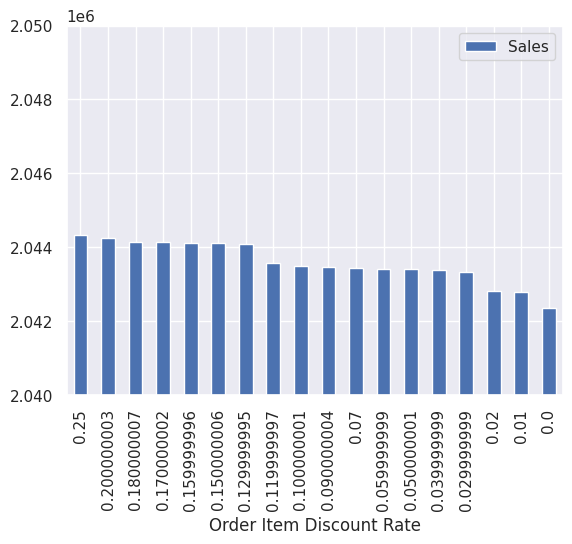

In [ ]:
data.groupby('Order Item Discount Rate')[['Sales']].sum().sort_values(by='Sales',ascending=False).plot(kind='bar').set_ylim(2.04e6,2.05e6)

**Intepretation:**

There are 18 order item discount rates. The highest one is 0.25, at which the sales is also the highest compared to any other rates. This chart shows that the higher rate leads to higher sales, which means that the customers prefer high discount rate.



<Axes: xlabel='Order Item Discount Rate'>

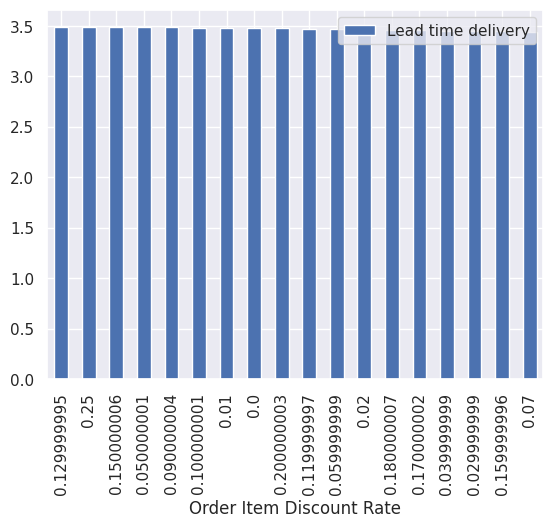

In [ ]:
data.groupby('Order Item Discount Rate')[['Lead time delivery']].mean().sort_values(by='Lead time delivery',ascending=False).plot(kind='bar')

(0.41, 0.44)

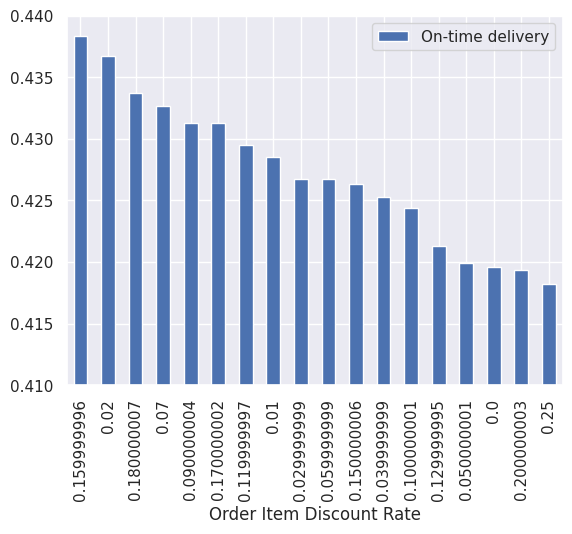

In [ ]:
data.groupby('Order Item Discount Rate')[['On-time delivery']].mean().sort_values(by='On-time delivery',ascending=False).plot(kind='bar').set_ylim(0.41,0.44)

**Intepretation:**

In the 18 discount rates above, the highest and lowest discount rate have relatively same level of on-time delivery rate. Each order discount has its own level of delivery rate, but there is no certain pattern or trend to conclude.

##Customer segment & Lead time

Text(0.5, 1.0, 'Percentage of customer segment')

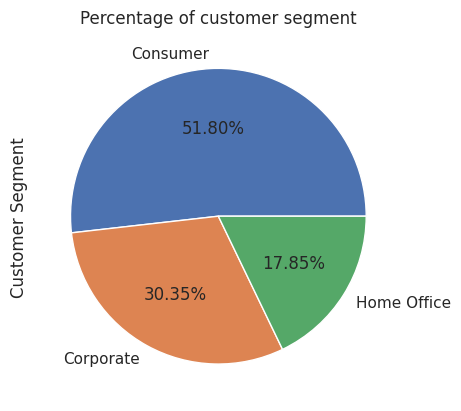

In [ ]:
data['Customer Segment'].value_counts().plot.pie(autopct='%1.2f%%')
plt.title('Percentage of customer segment')

**Intepretation:**

This pie chart shows the customer segment in percentage, in which Consumer accounts for over half of the customer number. The Corporate customer contributes nearly one-third, while Home Office makes up the lowest figure of 17.85%.

In [ ]:
data.groupby('Customer Segment')[['Lead time delivery']].mean().sort_values(by='Lead time delivery',ascending=False)

Lead time delivery
Customer Segment                    
Home Office                 3.489263
Consumer                    3.470750
Corporate                   3.463505

In [ ]:
data.groupby('Customer Segment')[['On-time delivery']].mean().sort_values(by='On-time delivery',ascending=False)

On-time delivery
Customer Segment                  
Corporate                 0.428882
Consumer                  0.427051
Home Office               0.424812

**Intepretation:**

It can be witnessed from the chart that customer segment impact so little on Lead time delivery and On time delivery.

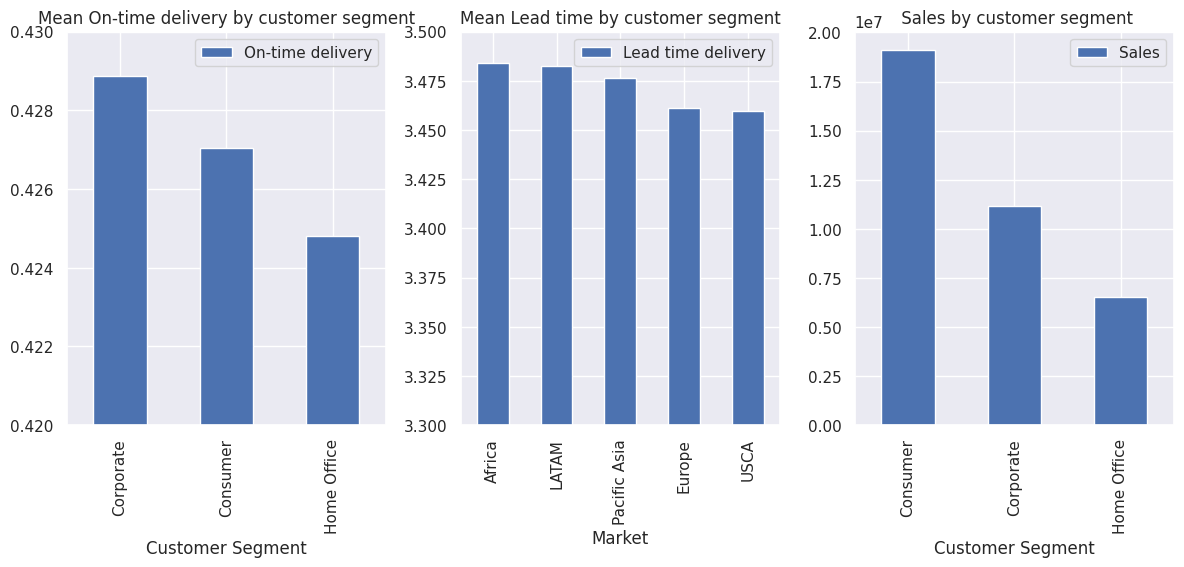

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(12, 6))

axes[0].set_title('Mean On-time delivery by customer segment')
data.groupby('Customer Segment')[['On-time delivery']].mean().sort_values(by='On-time delivery', ascending=False).plot(kind='bar', ax=axes[0])
axes[0].set_ylim(0.42,0.43)

axes[1].set_title('Mean Lead time by customer segment')
data.groupby('Market')[['Lead time delivery']].mean().sort_values(by='Lead time delivery', ascending=False).plot(kind='bar', ax=axes[1])
axes[1].set_ylim(3.3,3.5)

axes[2].set_title(' Sales by customer segment')
data.groupby('Customer Segment')[['Sales']].sum().sort_values(by='Sales', ascending=False).plot(kind='bar', ax=axes[2])

plt.tight_layout()
plt.show()

**Intepretation:**

The two bar charts demonstrates the mean on-time delivery rate and sales for each customer segment.

Even though the mean on-time delivery rate of Corporate is better than that of Consumer, sales of Corporate is remarkable lower than that of Consumer. This means that higher on-time delivery rate does not certainly determine higher sales.

Besides, Home Office has the lowest rate and lowest sales in comparision with figures in other segments.

##Product Category & Lead time

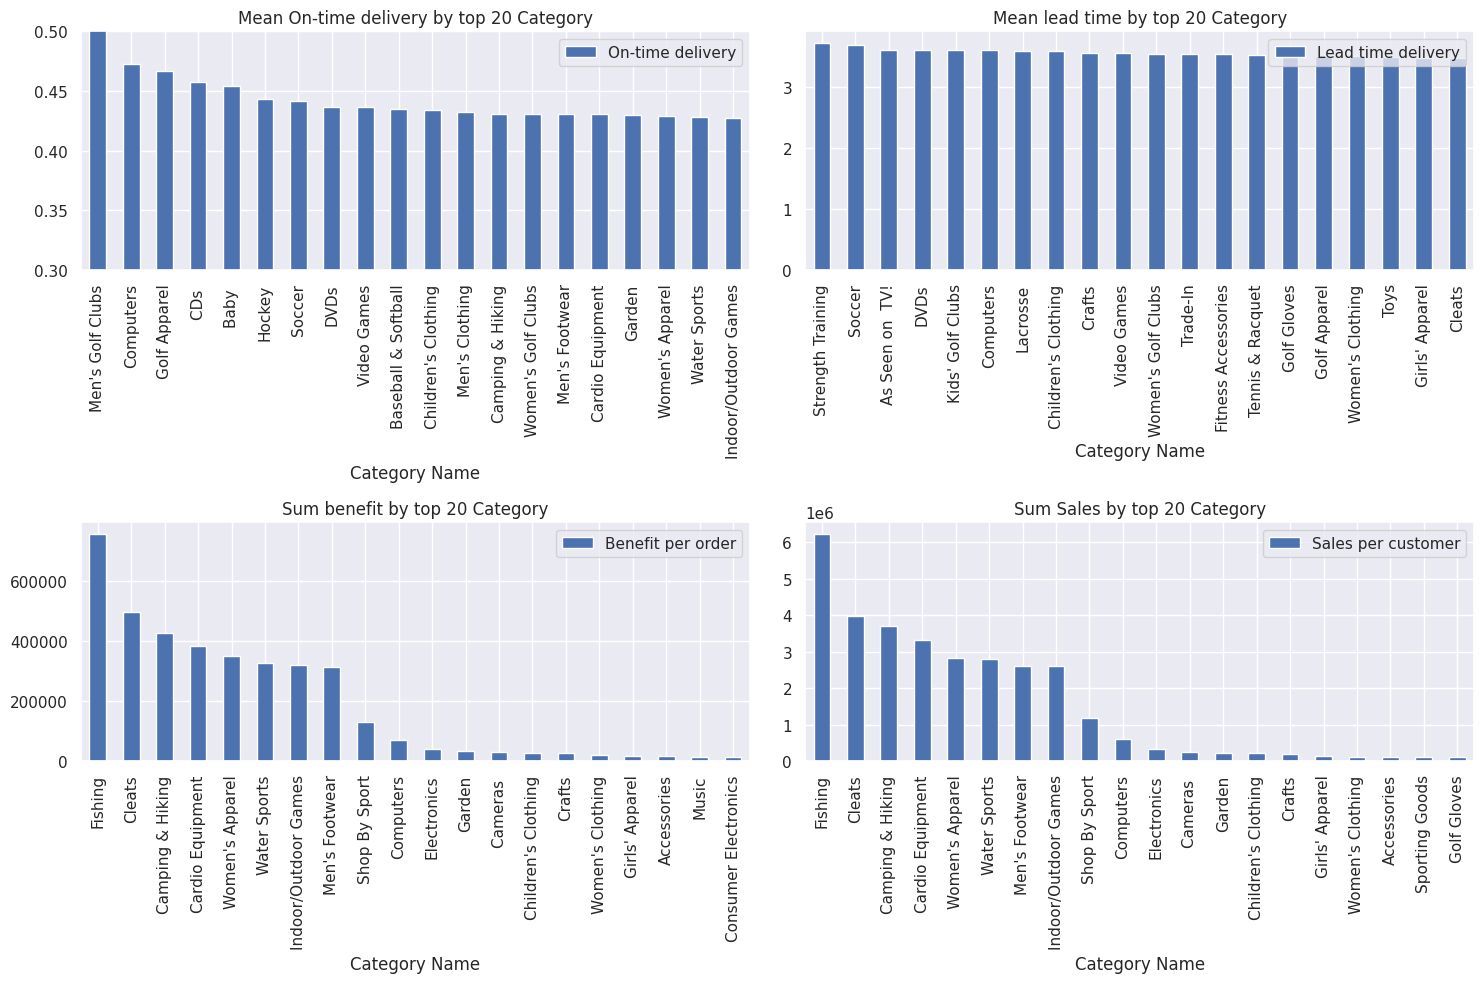

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

axes[0, 0].set_title('Mean On-time delivery by top 20 Category')
data.groupby('Category Name')[['On-time delivery']].mean().sort_values(by='On-time delivery', ascending=False).head(20).plot(kind='bar', ax=axes[0, 0])
axes[0, 0].set_ylim(0.3, 0.5)

axes[0, 1].set_title('Mean lead time by top 20 Category')
data.groupby('Category Name')[['Lead time delivery']].mean().sort_values(by='Lead time delivery', ascending=False).head(20).plot(kind='bar', ax=axes[0, 1])

axes[1, 0].set_title('Sum benefit by top 20 Category')
data.groupby('Category Name')[['Benefit per order']].sum().sort_values(by='Benefit per order', ascending=False).head(20).plot(kind='bar', ax=axes[1, 0])

axes[1, 1].set_title('Sum Sales by top 20 Category')
data.groupby('Category Name')[['Sales per customer']].sum().sort_values(by='Sales per customer', ascending=False).head(20).plot(kind='bar', ax=axes[1, 1])

plt.tight_layout()
plt.show()

**Intepretation:**

The first bar chart includes top 20 categories of products that have highest mean on-time delivery rates. However, the 20 categories that have highest sum benefits and sum sales are completely different from those with the first chart. This finding implies that on-time delivery rates **do not have the direct connection** or influence with the sum benefit and sum sales.

Besides, 18/20 catergories that have highest sum benefit also have highest sum sales, and the  exceptions are Music and Consumer Electronics.

Another feature is the mean lead time, and the lead time of top 20 categories is all higher than 3.5.

##Order quantity & Lead time

Text(0.5, 1.0, 'Mean on-time delivery for each order item quantity')

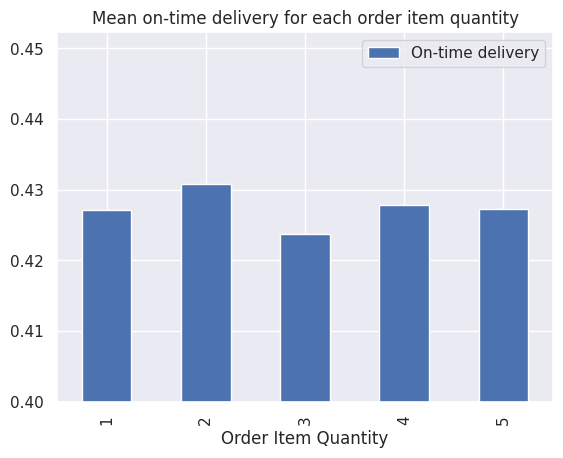

In [ ]:
data.groupby('Order Item Quantity')[['On-time delivery']].mean().plot(kind='bar').set_ylim(0.4,)
plt.title('Mean on-time delivery for each order item quantity')

**Intepretation:**

Each order quantity ranges from 1 to 5. While the order quantity of 3 has the lowest mean on-time delivery rate, the order quantity of 2 has the highest rate. The reason could be that the quantity of 2 items reaches the efficiency in delivery.

Text(0.5, 1.0, 'Mean of lead time delivery for each order item quantity')

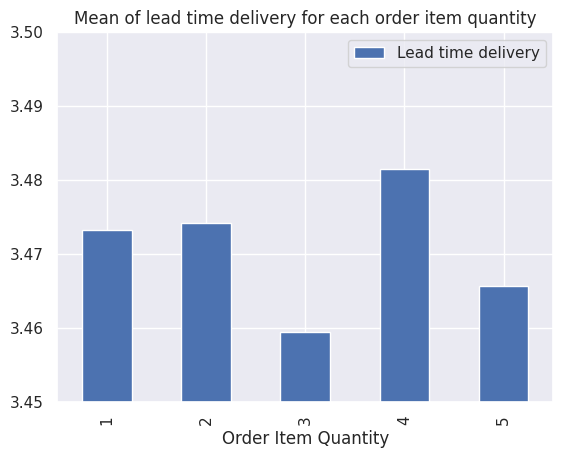

In [ ]:
data.groupby('Order Item Quantity')[['Lead time delivery']].mean().plot(kind='bar').set_ylim(3.45,3.5)
plt.title('Mean of lead time delivery for each order item quantity')

**Intepretation:**

The mean of lead time delivery is all higher than 3.45 and lower than 3.5, which means the mean lead time is shorter than 4.

Although the order item quantity of 3 has the lowest lead time delivery, it has the lowest on-time delivery rate.

Meanwhile, the quantity of 4 has the shortest lead time.

#EDA conclusion



1. Data Overview:
* Data set has 180519 observations, with 54 columns ranging from integer/float and object
* After carefully examining each column, we realize that 20 columns contain no or little information that we will use in our analysis and model training, therefore we delete them from our original dataset. We have 34 columns left.
* But during our Lead time delivery analysis, we have created 6 more columns about hour/weekday/month of order date and shipping date to see whether there's trend or underlined pattern towards lead time delivery.


2. Data Quality:
* In our dataset introduction, we have detected some columns with missing values, together with columns with no and little information, we have deleted them from our dataset
* Regarding outliers, we perform outliers detection and visualize those for numerical variables. We see that none of them follow normal distribution, and some are even heavily impacted by them.
* Since we have not yet know whether the features may be used in machine learning model or not (because we need to matching our findings on EDA and Feature selection methods), therefore we have not deleted outliers yet. But we will keep in mind those heavily impacted by outliers.

3. Feature Analysis:
* So far, we have analyzed 10 features (column name) in their relations to Lead time and On-time rate.
* We see that those following features have possible impact on Lead time delivery and On-time rate: (a) Order date (including hour, weekday, month), (b) Shipping mode, (c) Payment term, (d) Market (which has more impact on On-time delivery than number of Lead time delivery), (e) Order quantity

4. Recommendations:
* Because our findings based on EDA is just on seeable pattern of historical data, we have not been able to find the more appririate underline trend.
* Therefore, to make our model reliable, we will need to perform further techniques to select the right and approriate number of features for our model training.




#Data preparation

##Encoding categorical variables

Based on [Scikit learn library](https://scikit-learn.org/stable/modules/feature_selection.html#univariate-feature-selection), there are 6 methods of feature selection we can choose from. We chose the first 2 methods which are the most familiar ones:

- 1st, Univariate feature selection works by selecting the best features based on univariate statistical tests. It can be seen as a preprocessing step to an estimator.GenerichUnivariateSelection
- 2nd, Tree-based selection based on decision tree ensemble method.

We also make it easier with heatmap correlation analysis to choose features.

Next, we will choose Univariate Feature Selection method to go with. But firstly, we will have to prepare data with categorical variables by encoding them into numeric variables.

---
As for the process of categorical variables treating, we have 2 options to treat categorical variables:
- 1st option: use label encoding. Because ML models only take into account for numerical variables, label encoding enable us to transform categoricall variables into numeric one. But the cons is label encoding converts the categorical data into numerical ones, but it assigns a unique number(starting from 0) to each class of data. This may lead to the generation of priority issues during model training of data sets. A label with a high value may be considered to have high priority than a label having a lower value.
- 2nd option: use one-hot encoding (similar to get_dummy method). It encodes categorical varibles by create different columns and then assign binary values. This option can prevent the cons of label encoding method, however, it can consumes a lot of memory which might be expensive for us (since we use the limited Google Colab account)

---
After discussion, we will choose method one-hot encoding to prevent models underperformance, however, due to large number of categorical variables we have on our orignal 'data' file, we will do the following steps for our Data Preparation master process:
- 1st step: we use label encoding for all categorical variables in our original dataset
- 2nd step: we perform some feature selection methods to only choose the top 10 or top 12 most important features to train our model
- 3rd step: we will then use one-hot encoding for our features

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 43 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   Type                           180519 non-null  object        
 1   Days for shipping (real)       180519 non-null  int64         
 2   Days for shipment (scheduled)  180519 non-null  int64         
 3   Benefit per order              180519 non-null  float64       
 4   Sales per customer             180519 non-null  float64       
 5   Delivery Status                180519 non-null  object        
 6   Late_delivery_risk             180519 non-null  int64         
 7   Category Name                  180519 non-null  object        
 8   Customer City                  180519 non-null  object        
 9   Customer Country               180519 non-null  object        
 10  Customer Segment               180519 non-null  object        
 11  

In [ ]:
categorical_var = ['Type', 'Delivery Status', 'Category Name', 'Customer City', 'Customer Country',
                   'Customer Segment', 'Customer State', 'Customer Street', 'Department Name', 'Market',
                   'Order City', 'Order Country', 'Order Region', 'Order State',
                   'Order Status', 'Product Name', 'Shipping Mode',
                   'Revenue segment', 'Profit segment']

In [ ]:
numerical_var =  ['Benefit per order', 'Order weekday', 'Order month', 'Order hour', 'Shipping weekday', 'Shipping month', 'Shipping hour',
                 'Sales per customer', 'Late_delivery_risk', 'Category Id', 'Department Id',
                 'Latitude', 'Longitude', 'Order Id', 'Order Item Discount', 'Order Item Discount Rate',
                 'Order Item Profit Ratio', 'Order Item Quantity',
                 'Sales', 'Order Item Total', 'Order Profit Per Order', 'Product Price']

In [ ]:
data.drop(['shipping date (DateOrders)','order date (DateOrders)'], axis=1, inplace=True)

**Intepretation:**

Because most of our models do not consider datetime varibles, and since we have already created order/shipping weekday/hour/month and therefore 'shipping date (DateOrders)' and 'order date (DateOrders)' contain little information for machine learning, we will drop these columns.

In [ ]:
from sklearn.preprocessing import LabelEncoder
def label_encoder_features(df, categorical_features):
    encoded_features = df.copy()
    le = LabelEncoder()

    for feature in categorical_features:
        encoded_features[feature] = le.fit_transform(df[feature])

    return encoded_features

In [ ]:
encoded_data = label_encoder_features(data, categorical_var)
encoded_data.head()

Type  Days for shipping (real)  Days for shipment (scheduled)  \
0     1                         3                              4   
1     3                         5                              4   
2     0                         4                              4   
3     1                         3                              4   
4     2                         2                              4   

   Benefit per order  Sales per customer  Delivery Status  Late_delivery_risk  \
0          91.250000          314.640015                0                   0   
1        -249.089996          311.359985                1                   1   
2        -247.779999          309.720001                3                   0   
3          22.860001          304.809998                0                   0   
4         134.210007          298.250000                0                   0   

   Category Name  Customer City  Customer Country  ...  On-time delivery  \
0             40             66                 1  ...                 1   
1             40             66                 1  ...                 0   
2             40            452                 0  ...                 1   
3             40            285                 0  ...                 1   
4             40             66                 1  ...                 1   

   Lead time delivery  Order weekday  Order month  Order hour  \
0                   3              2            1          22   
1                   5              5            1          12   
2                   4              5            1          12   
3                   3              5            1          11   
4                   2              5            1          11   

   Shipping weekday  Shipping month  Shipping hour  Revenue segment  \
0                 5               2             22                2   
1                 3               1             12                2   
2                 2               1             12                2   
3                 1               1             11                2   
4                 0               1             11                1   

   Profit segment  
0               3  
1               5  
2               5  
3               1  
4               2  

[5 rows x 41 columns]

In [ ]:
columns_with_nan = encoded_data.columns[encoded_data.isna().any()].tolist()

print("Columns with NaN values:")
print(columns_with_nan)

Columns with NaN values:
[]


In [ ]:
negative_cols = encoded_data.columns[encoded_data.lt(0).any()]

print("Columns with negative values:")
print(negative_cols)

Columns with negative values:
Index(['Benefit per order', 'Latitude', 'Longitude',
       'Order Item Profit Ratio'],
      dtype='object')


In [ ]:
binary_cols = encoded_data.columns[(encoded_data.eq(0) | encoded_data.eq(1)).all()]
print("Columns with binary values:")
print(binary_cols)

Columns with binary values:
Index(['Late_delivery_risk', 'Customer Country', 'On-time delivery'], dtype='object')


**Intepretation:**

Because Univariate selection method does not support negative values and binary values, therefore, we will not include negative_cols and binary_cols in our univariate features selection.

##Feature selection method

###Univariate selection

Univariate feature selection works by selecting the best features based on univariate statistical teststests, which measures a significant difference against the controls or between different treatments altogether.

The univariate test can use different types of score function. Each score function has different purpose depending on input types and machine learning model.

Because we are trying to predict Lead time delivery and On-time delivery rate based on certain features, our problem can be seemed as classification. Score functions for classification may include: chi2, f_classif, mutual_info_classif

We will try these three functions to see whether there's significant difference among the results


In [ ]:
data[['Days for shipping (real)','Lead time delivery']].head(10)

Days for shipping (real)  Lead time delivery
0                         3                   3
1                         5                   5
2                         4                   4
3                         3                   3
4                         2                   2
5                         6                   6
6                         2                   2
7                         2                   2
8                         3                   3
9                         2                   2

**Intepretation:**

These two columns are the same, therefore, we will delete both columns in the features dataset and keep 'Lead time delivery' column in our target.

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

X = encoded_data.drop(['Days for shipping (real)', 'Lead time delivery','Benefit per order', 'Latitude', 'Longitude', 'Order Item Profit Ratio'], axis=1)
y = encoded_data[['Lead time delivery']]

bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X, y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']
print(featureScores.nlargest(10,'Score'))

                            Specs         Score
3                 Delivery Status  69889.831959
1   Days for shipment (scheduled)  49834.657371
26               On-time delivery  39777.796926
25                  Shipping Mode  38066.228762
4              Late_delivery_risk  28404.304706
10                Customer Street  14147.695414
21                    Order State  10546.252524
13                     Order City   3179.611406
24                  Product Price   2791.219656
6                   Customer City   2161.000853


**Intepretation:**

Among the top 10 features resulting from SelectKBest, we can see that 'Delivery Status', 'Days for shipment (scheduled)', 'On-time delivery', 'Shipping Mode' and 'Late_Delivery_risk' have the most significant chi-square score, and therefore, we will surely choose those features.

In [ ]:
from sklearn.feature_selection import mutual_info_classif

bestfeatures = SelectKBest(score_func=mutual_info_classif, k=10)
fit = bestfeatures.fit(X, y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']
print(featureScores.nlargest(10,'Score'))

                            Specs     Score
3                 Delivery Status  0.439621
25                  Shipping Mode  0.418017
1   Days for shipment (scheduled)  0.417856
10                Customer Street  0.264142
26               On-time delivery  0.259390
4              Late_delivery_risk  0.214450
13                     Order City  0.139940
21                    Order State  0.043718
6                   Customer City  0.018860
9                  Customer State  0.006465


**Interpretation:**

'Delivery Status', 'Shipping Mode', 'Days for shipment (scheduled)' have the highest scores, which are consistent with the SelectKBest method.

In [ ]:
from sklearn.feature_selection import f_classif

bestfeatures = SelectKBest(score_func=f_classif, k=10)
fit = bestfeatures.fit(X, y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']
print(featureScores.nlargest(10,'Score'))

                            Specs         Score
3                 Delivery Status  32335.516161
1   Days for shipment (scheduled)  27062.939539
25                  Shipping Mode  22967.652171
26               On-time delivery  22572.023946
4              Late_delivery_risk  19298.338879
21                    Order State     12.311289
9                  Customer State      9.749464
14                  Order Country      7.308254
0                            Type      4.757000
29                     Order hour      4.664252


**Intepretation:**

We see small different among the three results. Features list genereated by all three score functions include: 'Days for shipping (real)', 'Delivery Status', 'Days for shipment (scheduled)', 'On-time delivery' ,'Shipping Mode', 'Late_delivery_risk', 'Customer State', 'Customer Street', 'Order City', 'Order Country' ,'Type'

###Tree-based selection

Tree-based selection is part of SelectFromModel method. It compute impurity-based feature importances, which in turn can be used to discard irrelevant features.

Impurity means how well the tree split in data. In short, impurity score can identify which features have the strong decisive power in model training.

[0.01126512 0.12334986 0.00773359 0.12335652 0.04514721 0.00622391
 0.01668665 0.00585522 0.01365405 0.01516576 0.02240092 0.00574491
 0.01262257 0.02112846 0.0178597  0.00840969 0.0085804  0.00531894
 0.00608421 0.00764894 0.01653877 0.02034588 0.01495062 0.00617014
 0.00590832 0.1605712  0.06585745 0.06573867 0.01747063 0.02248579
 0.06646673 0.01737562 0.02367755 0.00493792 0.00726808]


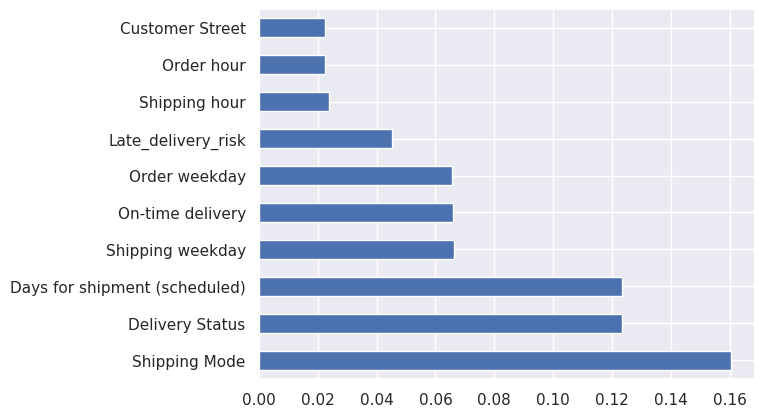

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_)

feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [ ]:
data['Customer Street'].nunique()

7458

**Intepretation:**

Our features generated by tree-based selection method are 'Shipping Mode, 'Days for shipment (scheduled)', 'On-time delivery' , 'Late_delivery_risk', 'Order weekday', 'Shipping weekday, 'Order hour', 'Shipping hour' and 'Customer Street'

However, due to the large size of 'Customer Street', we do not consider this to be in our features list.

Our final features list after running tree-based selection only include: 'Shipping Mode, 'Days for shipment (scheduled)', 'On-time delivery' , 'Late_delivery_risk', 'Order weekday', 'Shipping weekday, 'Order hour', 'Shipping hour'


###Heatmap feature selection

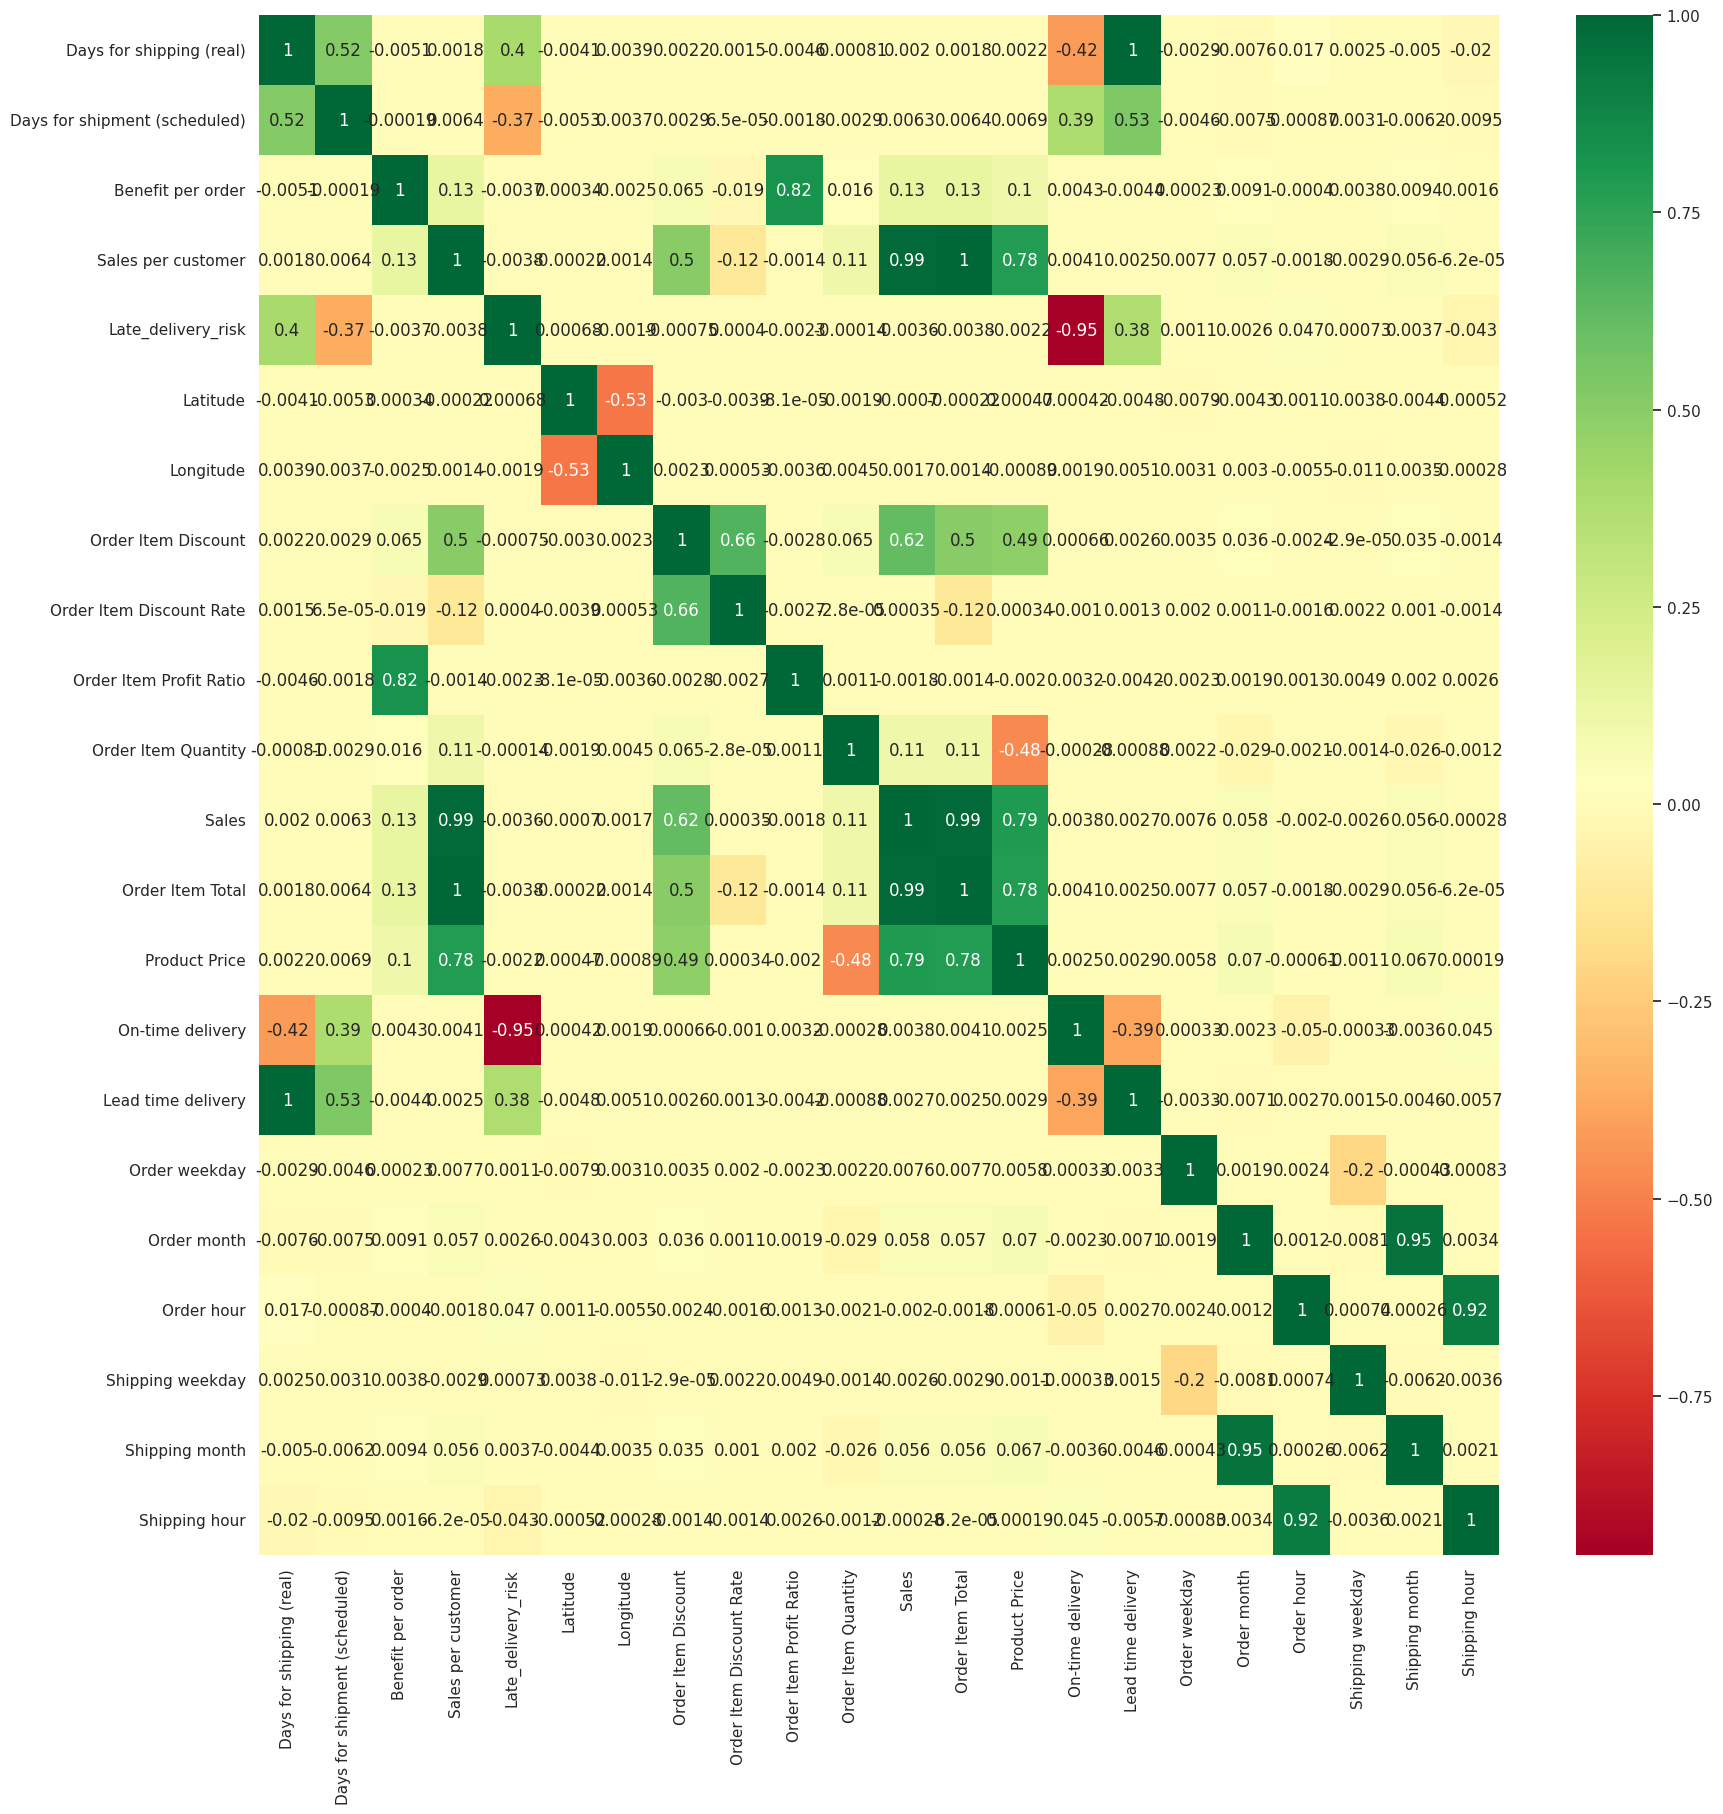

In [ ]:
corrmat = encoded_data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

**Intepretation:**

We will select the features generated by heatmap based on the correlation score (>= 0.3 or <= -0.3) with 'Lead time delivery' (whether it has inverse or same direction), include: 'Days for shipping scheduled)', 'Late_delivery_risk'


## Feature selection conclusion


Based on what we have conducted in Exploratory Data Analysis and Feature selection method, we conclude that the features list should comprise of 'Days for shipping (real)', 'Shipping Mode, 'Days for shipment (scheduled)', 'On-time delivery' , 'Late_delivery_risk', 'Order weekday', 'Shipping weekday, 'Order hour', 'Shipping hour', 'Order State', 'Order City', 'Type'

We now move to step 3 of Data Preparation process: we use one-hot encoding for our features.

In [ ]:
from sklearn.preprocessing import OneHotEncoder

def one_hot_encoder_features(df, categorical_features):
    encoded_features = df.copy()
    encoder = OneHotEncoder(sparse=False)

    for feature in categorical_features:
        encoded_feature = encoder.fit_transform(df[[feature]])
        encoded_feature_df = pd.DataFrame(encoded_feature, columns=[f"{feature}_{i}" for i in range(encoded_feature.shape[1])])
        encoded_features = pd.concat([encoded_features, encoded_feature_df], axis=1)
        encoded_features.drop(columns=[feature], inplace=True)

    return encoded_features

In [ ]:
features = data[['Shipping Mode', 'Days for shipment (scheduled)', 'On-time delivery' , 'Late_delivery_risk', 'Order weekday', 'Shipping weekday', 'Order hour', 'Shipping hour', 'Market', 'Type']]
features.head(5)

Shipping Mode  Days for shipment (scheduled)  On-time delivery  \
0  Standard Class                              4                 1   
1  Standard Class                              4                 0   
2  Standard Class                              4                 1   
3  Standard Class                              4                 1   
4  Standard Class                              4                 1   

   Late_delivery_risk  Order weekday  Shipping weekday  Order hour  \
0                   0              2                 5          22   
1                   1              5                 3          12   
2                   0              5                 2          12   
3                   0              5                 1          11   
4                   0              5                 0          11   

   Shipping hour        Market      Type  
0             22  Pacific Asia     DEBIT  
1             12  Pacific Asia  TRANSFER  
2             12  Pacific Asia      CASH  
3             11  Pacific Asia     DEBIT  
4             11  Pacific Asia   PAYMENT

In [ ]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 10 columns):
 #   Column                         Non-Null Count   Dtype 
---  ------                         --------------   ----- 
 0   Shipping Mode                  180519 non-null  object
 1   Days for shipment (scheduled)  180519 non-null  int64 
 2   On-time delivery               180519 non-null  int64 
 3   Late_delivery_risk             180519 non-null  int64 
 4   Order weekday                  180519 non-null  int64 
 5   Shipping weekday               180519 non-null  int64 
 6   Order hour                     180519 non-null  int64 
 7   Shipping hour                  180519 non-null  int64 
 8   Market                         180519 non-null  object
 9   Type                           180519 non-null  object
dtypes: int64(7), object(3)
memory usage: 13.8+ MB


**Intepretation:**

We can see that in our dataframe for features, only 'Shipping Mode', 'Market' and 'Type' has object type. Therefore, we will one-hot encodng these three variables.

In [ ]:
features_categorical_vars = ['Shipping Mode', 'Market', 'Type']
features = one_hot_encoder_features(features, features_categorical_vars)
features.head(5)

Days for shipment (scheduled)  On-time delivery  Late_delivery_risk  \
0                              4                 1                   0   
1                              4                 0                   1   
2                              4                 1                   0   
3                              4                 1                   0   
4                              4                 1                   0   

   Order weekday  Shipping weekday  Order hour  Shipping hour  \
0              2                 5          22             22   
1              5                 3          12             12   
2              5                 2          12             12   
3              5                 1          11             11   
4              5                 0          11             11   

   Shipping Mode_0  Shipping Mode_1  Shipping Mode_2  Shipping Mode_3  \
0              0.0              0.0              0.0              1.0   
1              0.0              0.0              0.0              1.0   
2              0.0              0.0              0.0              1.0   
3              0.0              0.0              0.0              1.0   
4              0.0              0.0              0.0              1.0   

   Market_0  Market_1  Market_2  Market_3  Market_4  Type_0  Type_1  Type_2  \
0       0.0       0.0       0.0       1.0       0.0     0.0     1.0     0.0   
1       0.0       0.0       0.0       1.0       0.0     0.0     0.0     0.0   
2       0.0       0.0       0.0       1.0       0.0     1.0     0.0     0.0   
3       0.0       0.0       0.0       1.0       0.0     0.0     1.0     0.0   
4       0.0       0.0       0.0       1.0       0.0     0.0     0.0     1.0   

   Type_3  
0     0.0  
1     1.0  
2     0.0  
3     0.0  
4     0.0

In [ ]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 20 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Days for shipment (scheduled)  180519 non-null  int64  
 1   On-time delivery               180519 non-null  int64  
 2   Late_delivery_risk             180519 non-null  int64  
 3   Order weekday                  180519 non-null  int64  
 4   Shipping weekday               180519 non-null  int64  
 5   Order hour                     180519 non-null  int64  
 6   Shipping hour                  180519 non-null  int64  
 7   Shipping Mode_0                180519 non-null  float64
 8   Shipping Mode_1                180519 non-null  float64
 9   Shipping Mode_2                180519 non-null  float64
 10  Shipping Mode_3                180519 non-null  float64
 11  Market_0                       180519 non-null  float64
 12  Market_1                      

In [ ]:
data['Lead time delivery'] = data['Lead time delivery']
target = data[['Lead time delivery']]
target.head(5)

Lead time delivery
0                   3
1                   5
2                   4
3                   3
4                   2

##Model selection

The characteristics of our problem:


*   Target: we need to predict how many days do orders take to be delivered to customers. Therefore, our models need to be regression model. Moreover, we will also use Logistics Regression model to predict the 'On-time delivery' rate of orders to see how well our features can determine the 'On-time rate'
*   Dataset size: 180K rows, 20 columns. We consider this dataset is not so big but medium size
*   Features: 20 features (actually 10 features, but we use one-hot encoding to treat categorical variables)

Based on what we described, we will choose Linear Regression, Logistics Regression, Decision Tree, Random Forest for regression for our models to predict Lead time delivery.

Hence, after performing, we will choose the most approriate machine learning models and come up with proposal to better predict our lead time days for future orders.





#Model building

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn import *
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import *
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestRegressor

##Linear Regression

In [ ]:
from sklearn.preprocessing import StandardScaler
features = StandardScaler().fit_transform(features)

In [ ]:
X_train_lr, X_test_lr, y_train_lr, y_test_lr = train_test_split(features, target, test_size=0.3, random_state=2)

In [ ]:
#implement
lr = LinearRegression()
lr_model = lr.fit(X_train_lr, y_train_lr)

y_pred_lr = lr_model.predict(X_test_lr)

predicted_int = [int(value) for value in y_pred_lr]

#print y_test vs y_pred
lr_train_predict = pd.DataFrame({'actual': y_test_lr.values.ravel(), 'predicted': predicted_int})
lr_train_predict.head(10)

actual  predicted
0       6          4
1       6          5
2       4          2
3       6          5
4       3          4
5       2          3
6       2          1
7       4          3
8       0          0
9       2          2

In [ ]:
from sklearn import metrics
meanAbErr = metrics.mean_absolute_error(y_test_lr, y_pred_lr)
meanSqErr = metrics.mean_squared_error(y_test_lr, y_pred_lr)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test_lr, y_pred_lr))
print('R squared: {:.2f}'.format(lr.score(features, target)*100))
print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)

R squared: 82.33
Mean Absolute Error: 0.5158034616697302
Mean Square Error: 0.4924820439651285
Root Mean Square Error: 0.701770649119161


###Metric interpretation
* R-squared (R2) is 82.33, indicating that the proportion of variance in the dependent variable that can be explained by the independent variable


* Mean Absolute Error (MSE) = 0.5158 suggests that MSE is relatively medium, which means the model result is not quite bad


* Mean Squared Error (RMSE) = 0.4923 indicates that the squared difference between predicted and actual values is quite big on average


* Root Mean Squared Error (RMSE) = 0.701 suggests that the absolute difference between the predicted and actual values is big


Linear Regression model seems to has a relatively bad fit to the data, as indicated by the relatively low, but further analysis is needed to prevent possibilities of overfitting.

###Linear function
Now let's visualize at our linear function. We can see that the datapoints tend to spread out when number of lead time increase.

In [ ]:
coefficients = lr.coef_
intercept = lr.intercept_

num_features = len(coefficients)
linear_function = f"y = {intercept}"

for i in range(num_features):
    linear_function += f" + {coefficients[i]}x{i+1}"

print(linear_function)

y = [3.47256432] + [ 1.70781690e+11 -1.24696350e+00 -8.55278499e-03  4.44139355e-03
  3.20810172e-03 -7.20901965e-01  7.24368056e-01  1.90602243e+11
  1.47331172e+11  1.59969612e+11  7.61212959e+10 -1.29741253e+10
 -2.37006255e+10 -2.38909872e+10 -2.22045601e+10 -1.85071946e+10
  7.37822803e+10  1.15296196e+11  9.99420595e+10  1.06016264e+11]x1


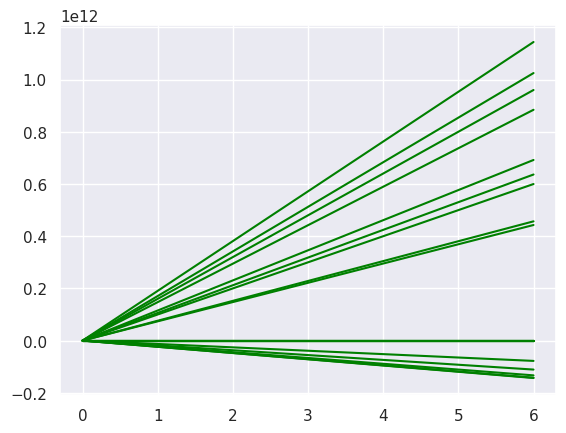

In [ ]:
y_test_lr_array = y_test_lr.values.flatten()
x = np.linspace(min(y_test_lr_array), max(y_test_lr_array), 100).reshape(-1, 1)
y = coefficients* x + intercept
plt.clf()
plt.plot(x, y, color='green', label='Linear Function')

##Logistic Regression

Because our target is to predict Lead time delivery ranging from (1,6,1). But we cannot use Logistic Regression where the target variable have three or more possible types, therefore, instead of trying to predict what days of lead time of delivery, we will use Logistic Regression to predict whether the orders are On-time delivery or not.

In [ ]:
features = data[['Shipping Mode', 'Days for shipment (scheduled)', 'On-time delivery' , 'Late_delivery_risk', 'Order weekday', 'Shipping weekday', 'Order hour', 'Shipping hour', 'Market', 'Type']]

features_categorical_vars = ['Shipping Mode', 'Market', 'Type']
features = one_hot_encoder_features(features, features_categorical_vars)
features.head(5)

Days for shipment (scheduled)  On-time delivery  Late_delivery_risk  \
0                              4                 1                   0   
1                              4                 0                   1   
2                              4                 1                   0   
3                              4                 1                   0   
4                              4                 1                   0   

   Order weekday  Shipping weekday  Order hour  Shipping hour  \
0              2                 5          22             22   
1              5                 3          12             12   
2              5                 2          12             12   
3              5                 1          11             11   
4              5                 0          11             11   

   Shipping Mode_0  Shipping Mode_1  Shipping Mode_2  Shipping Mode_3  \
0              0.0              0.0              0.0              1.0   
1              0.0              0.0              0.0              1.0   
2              0.0              0.0              0.0              1.0   
3              0.0              0.0              0.0              1.0   
4              0.0              0.0              0.0              1.0   

   Market_0  Market_1  Market_2  Market_3  Market_4  Type_0  Type_1  Type_2  \
0       0.0       0.0       0.0       1.0       0.0     0.0     1.0     0.0   
1       0.0       0.0       0.0       1.0       0.0     0.0     0.0     0.0   
2       0.0       0.0       0.0       1.0       0.0     1.0     0.0     0.0   
3       0.0       0.0       0.0       1.0       0.0     0.0     1.0     0.0   
4       0.0       0.0       0.0       1.0       0.0     0.0     0.0     1.0   

   Type_3  
0     0.0  
1     1.0  
2     0.0  
3     0.0  
4     0.0

In [ ]:
data['On-time delivery'] = data['On-time delivery']
target = data[['On-time delivery']]
target.head(5)

On-time delivery
0                 1
1                 0
2                 1
3                 1
4                 1

**Intepretation:**

To check for multi-collinearity in the independent variables, the Variance Inflation Factor (VIF) technique is used. The variables with VIF score of >10 means that they are very strongly correlated. Therefore, they are discarded and excluded in the logistic regression model.

Because our logistic regression model does not accept strongly correlation variables or high multicollinearity (which means a statistical concept where several independent variables in a model are correlated on the scale of 0 to 1 which perfectly collinear is inf). Therefore, we use Variance Inflation Factor (VIF) technique to check for multicollinearity in our features and exclude those with high or perfect VIF score.

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["Feature"] = features.columns
vif["VIF"] = [variance_inflation_factor(features.values, i) for i in range(features.shape[1])]
print(vif)

                          Feature        VIF
0   Days for shipment (scheduled)        inf
1                On-time delivery  11.672872
2              Late_delivery_risk  11.320205
3                   Order weekday   1.043710
4                Shipping weekday   1.043543
5                      Order hour   6.917711
6                   Shipping hour   6.919693
7                 Shipping Mode_0        inf
8                 Shipping Mode_1        inf
9                 Shipping Mode_2        inf
10                Shipping Mode_3        inf
11                       Market_0        inf
12                       Market_1        inf
13                       Market_2        inf
14                       Market_3        inf
15                       Market_4        inf
16                         Type_0        inf
17                         Type_1        inf
18                         Type_2        inf
19                         Type_3        inf


There are several features with high VIF values, indicating potential multicollinearity issues. Specifically, features such as "On-time delivery," "Late_delivery_risk," "Order hour," "Shipping hour," and others have relatively high VIF values. On the other hand, features like "Order weekday" and "Shipping weekday" have VIF values close to 1, suggesting low multicollinearity.

Other features variables with inf values of VIF means they are predictor variables in a regression model can be perfectly predicted by a linear combination of the other variables. This means that there is a perfect relationship or dependency between those variables, making it impossible to estimate the regression coefficients accurately.

It is generally recommended to address multicollinearity issues by either removing highly correlated variables. Therefore, we will only keep features such as  "Order weekday" and "Shipping weekday" to train our model.

In [ ]:
features = data[['Order weekday', 'Shipping weekday']]
features.head(5)

Order weekday  Shipping weekday
0              2                 5
1              5                 3
2              5                 2
3              5                 1
4              5                 0

In [ ]:
X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(features, target, test_size = 0.20, random_state = 99)
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression(max_iter=1000)

log_model.fit(X_train_log, y_train_log)
log_model.score(X_test_log, y_test_log)

0.5689674274318635

###Overview

In [ ]:
import statsmodels.api as sm
logit_model = sm.Logit(target, features)
result = logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.684102
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:       On-time delivery   No. Observations:               180519
Model:                          Logit   Df Residuals:                   180517
Method:                           MLE   Df Model:                            1
Date:                Fri, 20 Oct 2023   Pseudo R-squ.:               -0.002330
Time:                        08:12:10   Log-Likelihood:            -1.2349e+05
converged:                       True   LL-Null:                   -1.2321e+05
Covariance Type:            nonrobust   LLR p-value:                     1.000
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Order weekday       -0.0414      0.002    -24.438      0.000      -0.045      -0.038
Shipping we

**Intepretation:**

- The Pseudo R-squared value is -0.002330, which a measure of how well the model fits the data, indicate that logistic regression model does not fit the data well.

- Log-Likelihood value is -1.2349e+05 suggesting that the model is not a good fit for the data.

- LL-Null represents the log-likelihood of a model with no predictors (only an intercept term). It serves as a reference point to compare the goodness of fit of the current model. The LL-Null value = -1.2321e+05 is just a little bit higher (less negative) than the Log-Likelihood value, indicating that the current model does not provide a better fit than the model with no predictors.

- Similarly, the LLR p-value is 1 supporting the above statment that the current model does not provide a significantly better fit than a model with no predictors.

- Order weekday: The coefficient estimate for the predictor variable "Order weekday" is -0.0414. This suggests that a one-unit increase in "Order weekday" is associated with a decrease in the log-odds of on-time delivery by 0.0414 units (the log-odds is the natural log of a relationship between the exposure of 'Order weekday' and 'Shipping weekday' and the occurrence of the 'On-time delivery' rate).

- Shipping weekday: The coefficient estimate for the predictor variable "Shipping weekday" is -0.0418. This suggests that a one-unit increase in "Shipping weekday" is associated with a decrease in the log-odds of on-time delivery by 0.0418 units.

- The standard errors, z-scores, and p-values provide information about the statistical significance of each coefficient estimate. In this case, the p-values are very close to 0, indicating that both predictor variables are statistically significant in predicting on-time delivery.

In [ ]:
X_train_lg, X_test_lg, y_train_lg, y_test_lg = train_test_split(features, target, test_size=0.3, random_state=0)

from sklearn.linear_model import LogisticRegression
from sklearn import metrics

logreg = LogisticRegression()
logreg.fit(X_train_lg, y_train_lg)

LogisticRegression()

In [ ]:
y_pred_lg = logreg.predict(X_test_lg)

print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test_lg, y_test_lg)))

Accuracy of logistic regression classifier on test set: 0.57


###Metric interpretation

An accuracy of 0.57 means that the classifier correctly predicted the labels for 57% of the test instances, which can tell that the Logistic Regression model is not so good for predicting On-time delivery.

Because our data can be seem as small to medium average dataset in size, therefore, we will use cross-validation to provide more insights into the stability and variability of the model's performance by evaluating the model on different subsets of the dat and assessing how much the performance metrics vary.



###Cross validation

In [ ]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score

kfold = model_selection.KFold(n_splits=10, random_state=None, shuffle=True)
modelCV = LogisticRegression()
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, X_train_lg, y_train_lg, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

10-fold cross validation average accuracy: 0.573


In [ ]:
from sklearn.metrics import confusion_matrix

confusion_matrix = confusion_matrix(y_test_lg, y_pred_lg)
print(confusion_matrix)

[[30942     0]
 [23214     0]]


**Intepretation:**

The result is telling us that we have 30942 correct predictions on 0 (which means not on-time delivery) and 0 incorrect predictions on 1 (which means on-time delivery rate). In other words, the model only predicts which orders to be late for delivery.

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test_lg, y_pred_lg))

              precision    recall  f1-score   support

           0       0.57      1.00      0.73     30942
           1       0.00      0.00      0.00     23214

    accuracy                           0.57     54156
   macro avg       0.29      0.50      0.36     54156
weighted avg       0.33      0.57      0.42     54156



###Cross valuation metric intepretation

- Precision: the precision is 0.57 for class 0, indicating that 57% of the instances predicted as class 0 are actually true positives.

- Recall: the model correctly identified all instances of class 0.

- F1-score: taking into account both precision and recall. For class 0, the F1-score is 0.73.

- Accuracy: the accuracy of the model is reported as 0.57, indicating that it correctly predicted 57% of the instances in the test set.



###ROC curve
Now let's visualize the result by **ROC curve (Receiver Operating Characteristic curve)**.

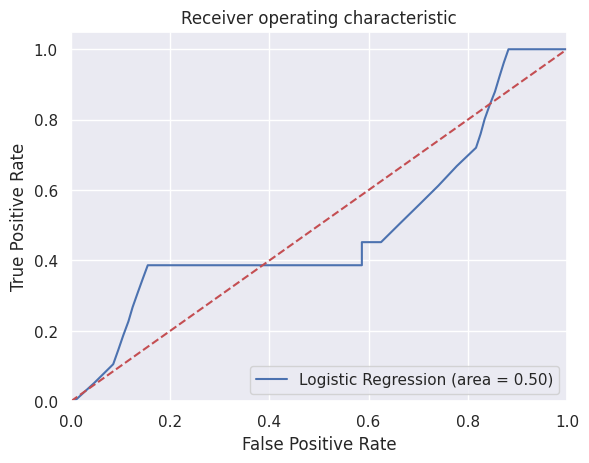

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(y_test_lg, logreg.predict(X_test_lg))
fpr, tpr, thresholds = roc_curve(y_test_lg, logreg.predict_proba(X_test_lg)[:,1])
plt.figure()

plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')

plt.show()

###Conclusion

We can see the accuracy just raised a 0.5% higher than before cross-validation. And the final accuracy for the model is just 57%. We can make conclusion that Logistic regression model does not perform well on our features and target data.

##Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
features = data[['Shipping Mode', 'Days for shipment (scheduled)', 'On-time delivery' , 'Late_delivery_risk', 'Order weekday', 'Shipping weekday', 'Order hour', 'Shipping hour', 'Market', 'Type']]

features_categorical_vars = ['Shipping Mode', 'Market', 'Type']
features = one_hot_encoder_features(features, features_categorical_vars)

In [ ]:
target = data[['Lead time delivery']]
target.astype(int)
target.head(5)

Lead time delivery
0                   3
1                   5
2                   4
3                   3
4                   2

In [ ]:
X_train_dt, X_test_dt, y_train_dt, y_test_dt = train_test_split(features, target, test_size=0.2, random_state=42)

In [ ]:
#fitting
dt_model = DecisionTreeRegressor(criterion='squared_error', splitter='best', max_depth=5, min_samples_split=2, min_samples_leaf=1, max_features=None, random_state=42)
dt_model.fit(X_train_dt, y_train_dt)

DecisionTreeRegressor(max_depth=5, random_state=42)

In [ ]:
#predit
y_pred_dt = dt_model.predict(X_test_dt)

meanAbErr = metrics.mean_absolute_error(y_test_dt, y_pred_dt)
meanSqErr = metrics.mean_squared_error(y_test_dt, y_pred_dt)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test_dt, y_pred_dt))
print('R squared: {:.2f}'.format(dt_model.score(features, target)*100))
print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)

R squared: 82.82
Mean Absolute Error: 0.48947546472304887
Mean Square Error: 0.48047935432786454
Root Mean Square Error: 0.6931661808887278


###Metric interpretation

- The R-squared value is 82.82% meaning that 82.8% of all target data points can be explained by the features in the decision tree

- The Mean Absolute Error is 0.489 indicates that, on average, the model's predictions are close to the actual values, with an average absolute difference of 0.489.

- The Mean Squared Error is 0.480 (lower than MAPE) indicates that, on average, the model's predictions are closer to the actual values, with an average squared difference of 0.480.

- The Root Mean Squared Error is 0.693 is in the same unit as the target variable, which in this case is "days." A lower RMSE indicates that, on average, the model's predictions have smaller residuals or errors.

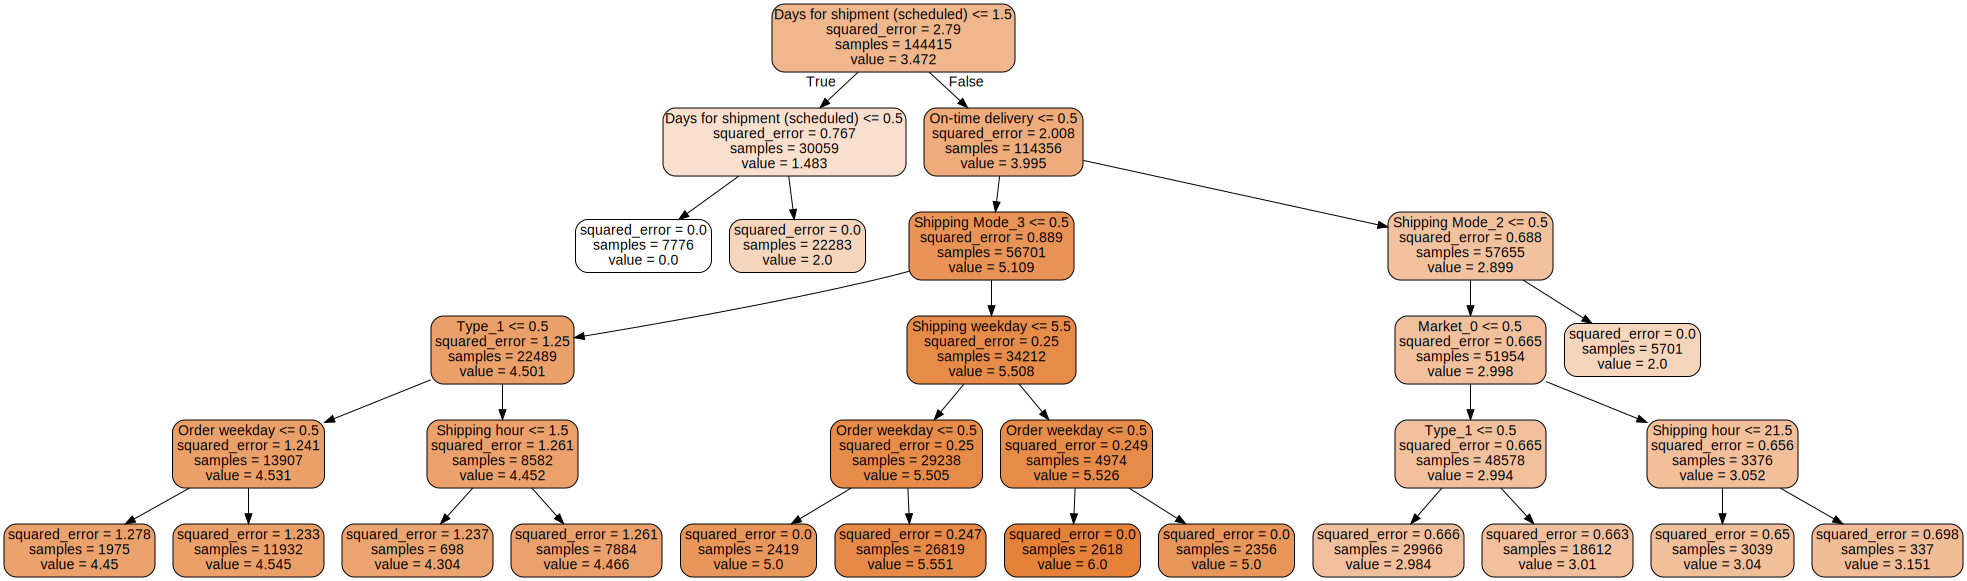

In [ ]:
from sklearn.tree import export_graphviz
import graphviz

export_graphviz(dt_model, out_file='tree_structure.dot',
               feature_names=['Days for shipment (scheduled)', 'On-time delivery', 'Late_delivery_risk', 'Order weekday', 'Shipping weekday', 'Order hour', 'Shipping hour', 'Shipping Mode_0', 'Shipping Mode_1', 'Shipping Mode_2', 'Shipping Mode_3', 'Market_0', 'Market_1', 'Market_2', 'Market_3', 'Market_4', 'Type_0', 'Type_1', 'Type_2', 'Type_3'],
               filled=True, rounded=True)

# Generate an image of the tree structure
with open('tree_structure.dot') as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

###Conclusion
Looking at our decision tree image, we notice that:

- Root: is the feature 'Days for shipment (scheduled)' which is below 1.5 days
- Left Branch after root is also the Decision Node,'Days for shipment (scheduled)' which is below 0.5 days
- Right Branch is 'On-time delivery' which is below 0.5 days
- Leaf node: Next leaf nodes include 'Shipping Mode_2' and 'Shipping Mode_3', then comes to 'Type_1', 'Shipping weekday', 'Market_0'
- Decision Node: mainly include 'Order weekday', 'Shipping hour'
- A darker color would generally represent a higher predicted value. As the tree goes deeper, the color gets darker

##Random Forest
Some characteristics about Random Forest model are:
- Random forest algorithm is an ensemble learning technique combining numerous classifiers to enhance a model’s performance.

- Random Forest is a supervised machine-learning algorithm made up of decision trees.

- Random Forest is used for both classification and regression problems.

That's why we find the model is suitable for our problem now.



###Initial RF model

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
features = data[['Shipping Mode', 'Days for shipment (scheduled)', 'On-time delivery' , 'Late_delivery_risk', 'Order weekday', 'Shipping weekday', 'Order hour', 'Shipping hour', 'Market', 'Type']]

features_categorical_vars = ['Shipping Mode', 'Market', 'Type']
features = one_hot_encoder_features(features, features_categorical_vars)

In [ ]:
target = data[['Lead time delivery']]
target.astype(int)
target.head(5)

Lead time delivery
0                   3
1                   5
2                   4
3                   3
4                   2

In [ ]:
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(features, target, test_size=0.2, random_state=42)

In [ ]:
#implement
rf_model = RandomForestRegressor(n_estimators=100, criterion='squared_error', max_depth=5, min_samples_split=2, min_samples_leaf=1, max_features=1.0, bootstrap=True, random_state=42, verbose=0)

rf_model.fit(X_train_rf, y_train_rf)
y_pred_rf = rf_model.predict(X_test_rf)
score = rf_model.score(X_test_rf, y_test_rf)

In [ ]:
y_pred_rf = rf_model.predict(X_test_rf)

meanAbErr = metrics.mean_absolute_error(y_test_lr, y_pred_lr)
meanSqErr = metrics.mean_squared_error(y_test_lr, y_pred_lr)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test_lr, y_pred_lr))

print('R squared: {:.2f}'.format(rf_model.score(features, target)*100))
print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)

R squared: 83.17
Mean Absolute Error: 0.5158034616697302
Mean Square Error: 0.4924820439651285
Root Mean Square Error: 0.701770649119161


###Initial RF model interpretation
- The R squared value is 83.17%, which means that approximately 83.17% of the variance in the target variable is explained by the model.
- The MAE is 0.5158, which suggests that, on average, the model's predictions deviate by approximately 0.5158 units from the actual values.
- The MSE is 0.4925, indicating the average squared difference between the model's predictions and the actual values
- The RMSE is 0.7018, which means that, on average, the model's predictions deviate by approximately 0.7018 units from the actual values.
- Overall, the random forest model generates metrics quite similar to Linear Regression model.


Let's look at the visualization

###Hyperparameter tuning

"Hyperparameter tuning is the process of finding the optimal set of hyperparameters for a machine learning model. It is important to tune the hyperparameters of a model to get the best performance on the task at hand". There are different method to tune hyperparameter, using GridSearch, RandomSearch, Bayesian optimization, Gaussian Process (GP),Tree-Parzen Estimator (TPE), Covariance Matrix Adaptation Evolutionary Strategy (CMA-ES). Each has different characteristics as decribed shortly below:

- GridSearch: a grid of hyperparameter values is specified, and the model is trained and evaluated using all possible combinations of these values => Cons: time consuming

- RandomSearch: a distribution of hyperparameter values is specified, faster than grid search => Cons: it does not evaluate all possible combinations of hyperparameters.

- Bayesian optimization: is the probabilistic model to guide the search for the best set of hyperparameters for a given model => Cons: expensive

- Gaussian Process (GP): similar to Bayesian but use different function => Cons: expensive

- Tree-Parzen Estimator (TPE) => Cons: expensive

- Covariance Matrix Adaptation Evolutionary Strategy (CMA-ES): uses an evolutionary algorithm to guide the search for the best set of hyperparameters for a given model => Cons: expensive

After our group discussion, we will go with the most popular technique to tune our hyperparameter for Random Forest, which is Random Search

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

We will use rnadom search to find the best hyperparameters

In [ ]:
param_dist = {'n_estimators': randint(50, 500),
              'max_depth': randint(1, 20)}

rand_search = RandomizedSearchCV(rf_model,
                                 param_distributions=param_dist,
                                 n_iter=5,
                                 cv=5,
                                 verbose=0)

rand_search.fit(X_train_rf, y_train_rf)

RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(max_depth=5,
                                                   random_state=42),
                   n_iter=5,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7b1234155bd0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7b1234154e50>})

In [ ]:
best_rf = rand_search.best_estimator_
print('Best hyperparameters:',  rand_search.best_params_)

Best hyperparameters: {'max_depth': 12, 'n_estimators': 167}


In [ ]:
rf_model_best = RandomForestRegressor(n_estimators = best_rf.n_estimators,
                                 max_depth = best_rf.max_depth)
rf_model_best.fit(X_train_rf, y_train_rf)

RandomForestRegressor(max_depth=12, n_estimators=167)

In [ ]:
y_pred_rf = rf_model_best.predict(X_test_rf)

meanAbErr = metrics.mean_absolute_error(y_test_rf, y_pred_rf)
meanSqErr = metrics.mean_squared_error(y_test_rf, y_pred_rf)
rootMeanSqErr = np.sqrt(meanSqErr)
r_squared = rf_model_best.score(X_test_rf, y_test_rf) * 100

print('R squared: {:.2f}'.format(r_squared))
print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)

###After tunning interpretation

Before Random Search:

- R squared: 83.17%
- Mean Absolute Error: 0.5158
- Mean Square Error: 0.4925
- Root Mean Square Error: 0.7018

After Random Search:
- R squared: 100.00%
- Mean Absolute Error: 0.0025
- Mean Square Error: 3.82e-05
- Root Mean Square Error: 0.0062


---


**Metric interpretation:**
- The R squared value has improved from 83.17% to 100.00%, indicating a better fit of the model to the data after the random search.
- The MAE, MSE, and RMSE have all significantly decreased, indicating better accuracy and smaller errors compared to the initial model.
- Random Search has improved significantly the performance of Random Forest Model with the following parameters:
+ Best hyperparameters: {'max_depth': 18, 'n_estimators': 478}



---
**Visualization**
- Root: is the feature 'Days for shipment (scheduled)' which is below 1.5 days => Which is similar to Decision Tree model we have run earlier

- Left Branch after root is also the Decision Node, 'Shipping Mode_1' => Which is different from Decision Tree model when 'Days for shipment (scheduled)' below 0.5 days is the left branch

- Right Branch is 'On-time delivery' which is below 0.5 days => Which is similar to Decision Tree model

- Leaf node: Next leaf nodes include 'Shipping Mode_3' and 'Days for shipment (scheduled)' below 3 days, then comes to 'Type_1', 'Shipping weekday' below 2.5 days => Which are not included 'Market' in the leaf node as Decision Tree does

- Decision Node: mainly include 'Order weekday', 'Shipping hour', 'Order hour' and 'Shipping hour' => Which have more decision node ('Order hour' and 'Shipping hour') compared to Decision Tree model

- A darker color would generally represent a higher predicted value. As the tree goes deeper, the color gets darker. Moreover, the darker color has smaller squared_error similar to what we have observed in Decision Tree model

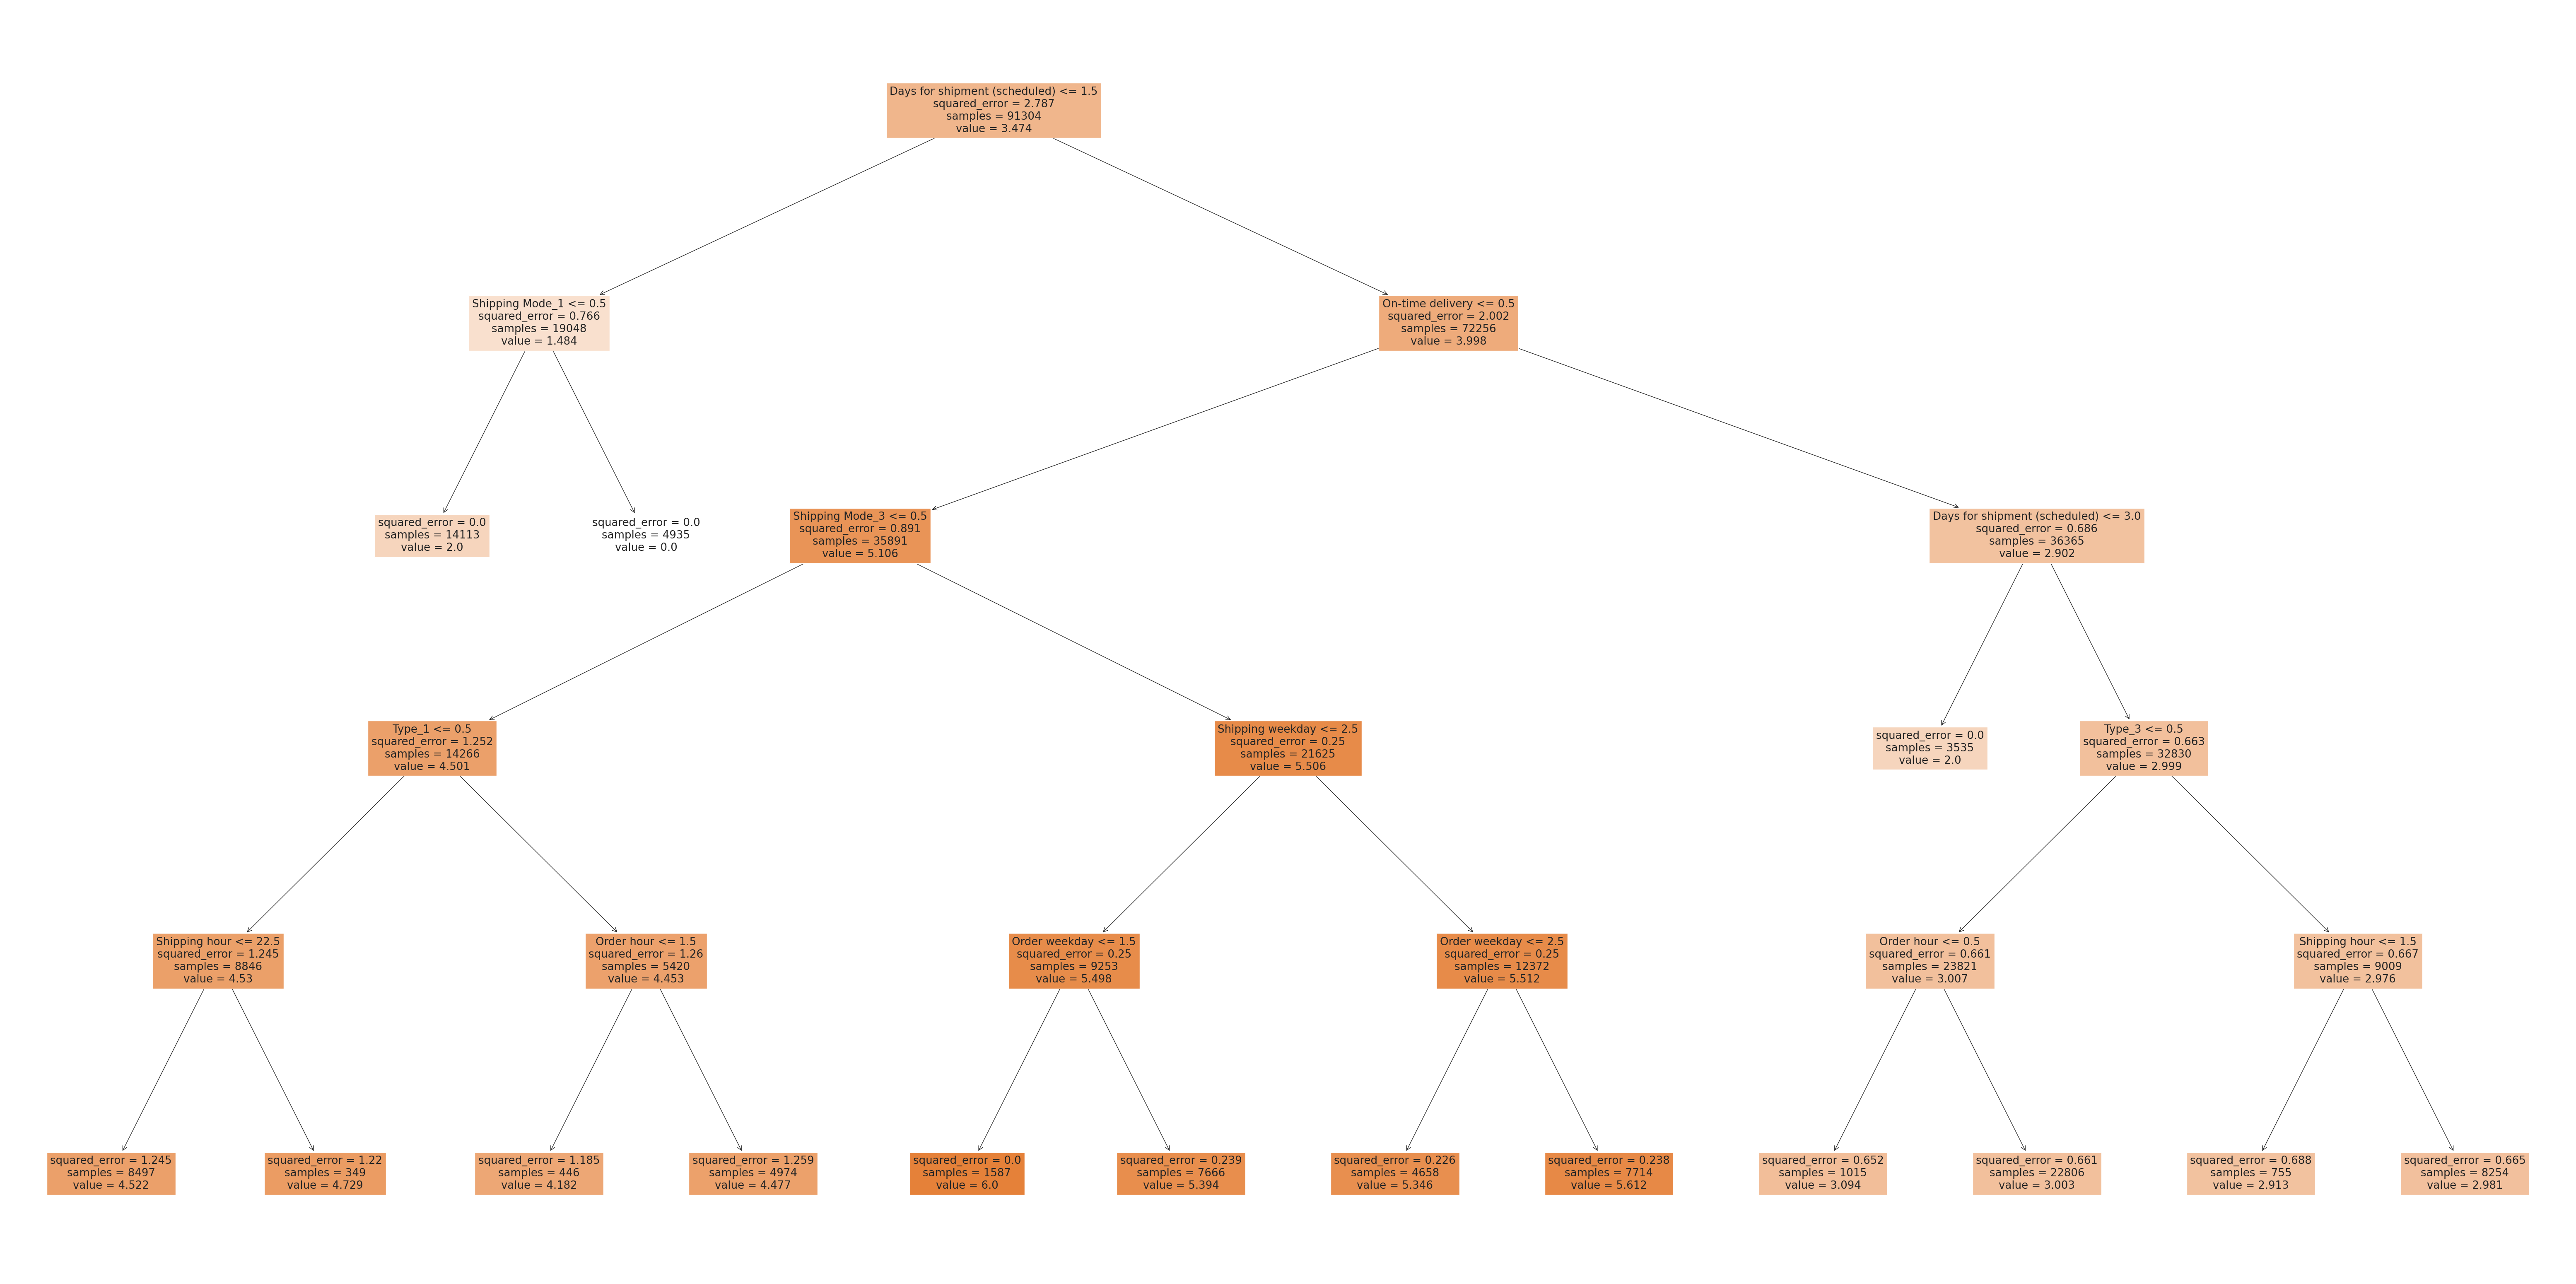

In [ ]:
from sklearn.tree import plot_tree
plt.figure(figsize=(80,40))
plot_tree(rf_model[10], feature_names = features.columns, class_names=['On-time delivery'], filled=True);

#Master conclusion & Future work

Here are some ideas of future work to improve the performance of the data model further. Moreover, we also provide some overall conclusion to our work:

**1. Features selection**

* Current method

We have chosen features based on Exploratory Data Analysis and perform some test by 3 main method (univariate selection through SelectKBest, mutual_info_classif, f_classif; Tree-based selection and Heatmap feature selection).

However, due to the shortage of resources, and as our features are mainly in category, we cannot use all columns name as larger number of features and be able to transfer it into numeric values by one-hot encoding. Therefore, as we noticed in our model performance, our machine learning models are prone to overfitting.

* Recommendation

That problem is avoidable if we can select more features to train our model and just use one-hot encoding all features that we have selected.

For future work, we would recommend users to do more on features selection testing method, encoding all possible features and use premium Google Colab platform or use PyCharm for better experience.

---
**2. Model selection**
* Our problem-to-be-solved

As our problem is to predict orders based on certain numbers of features into number of lead time days possible, we use classifer machine learning models except Linear Regression (which we use to predict binary output for On-time delivery rate).

We will describe each model's performance shortly as below and give some recommendation for further performance:

* **Linear Regression:**

At first, we make assumption that if we encode categorical variables into numerical ones, linear regression may work quite well if there is any relationship between our data. It turns out that the model is the bad fit for our features.

Future work may want to enlist all possible features and input for the model, not just 10 features like we did on our feature list
* **Logistic Regression**:

As the model only looks at binary values, we have to choose only other target but still similar to our inital target (change to 'On-time delivery' rate from 'Lead time delivery).

Logistic Regression also restrict multicollinearity variables to be its input variables, so we have to perform VFI test and at the end, we are only able to choose two features to input in our model, which are 'Order weekday and 'Shipping weekday'. We believe that with only two features, the result is not reliable. Although the model's metric is so bad with only 57% of accuracy, we still think we need to perform more techniques to evaluate the result.

That's the reason why we chose cross-validation method for the next step. Cross-validation works by dividing the data into k-folds and training the model on k-1 of the folds while using the remaining fold for validation. We chose k = 10 for more reliable result. However, the result (accuracy) gets the same with the initial Logistic Regression (without Cross-validation) version.

Therefore, we concluded that the data does not fit well with Logistic Regression.

* **Decision Tree**:

Because our features in specific, do not follow Gaussian distribution, we therefore think Decision Tree will be one of the most approriaite model for our data. As the decision trees is used to fit a sine curve with addition noisy observation.

It turns out that the metrics measuring the performance of Decision Tree actually very good. However, there will be a better method even than decision tree, that is random forest, when we can utilize the crowd wisdom to choose the most approriate decision tree for our data to fit in as in random forest, each decision tree in the ensemble is trained on a different subset of the data, and the final predictions are made by aggregating the predictions of all the individual trees.

This ensemble approach helps to improve the model's performance by reducing overfitting and capturing a broader range of patterns and relationships present in the data.

* **Random Forest**:

At first, the model perform badly as Linear Regression (Actually it's just a little better). However, after doing hyperparameter tuning (Random Search), the results seems to improve a lot.

Because of our memory shortage, we do not try on Grid Search for hyperparameter. However, Random Search seems to not as good as Grid Search as grid search looks at every possible combination of hyperparameters to find the best model, random search only selects and tests a random combination of hyperparameters which can create bias and prone to failures.

We actually recommend to try on different methods of hyperparameter to see if the metrics get better, but we also want to bear in mind that the more accurate does not mean the better model. As we must take into consideration of possible overfitting.

---
**3. Model performance and result**

Short reminds of the result for all the model as below.

* Linear Regression: R squared= 82.83%; MAE = 0.52; MSE=0.49; RMSE=0.7.

There are big differences between the predicted and actual values. Besides, this model is more suitable for large numerical values than medium sizes like this dataset. It is likely that there might be numerical instability or other issues. To fully analyze the results of a linear regression model, additional information is needed

* Logistic Regression: Accuracy: 0.57.

The result states that the Logistic Regression model might not be a good fit for the range of our dataset. This model can prove that both "Order weekday" and "Shipping weekday" variables are statistically significant predictors of on-time delivery, but its accuracy is only around 57% and without additional context or interpretation of the coefficients' magnitude, it is difficult to draw more specific conclusions.

The logistic regression with cross validation can measure the value of late shipment with moderate accuracy (high precision, recall, and F1-score) but measure the value of on-time delivery with low performance (low precision, recall, and F1-score). The model's inability to identify any instances of class 1 suggests that it is not effectively capturing the patterns and characteristics of the positive class. It is suggested that we should use an alternative model

* Decision Tree: R squared= 82.82%; MAE= 0.49; MSE= 0.48; RMSE= 0.69

The model can be an appropriate tool to use, indicated by the high R-squared value, low deviation value and average squared differences between actual value and prediction. However, lower values of MAE and MSE, RMSE may return better performance. The decision tree model, compared to other models can have more flexibility and the ability to capture complex relationships in the data. The evaluation metrics provided, such as R-squared, MAE, MSE, and RMSE, are rather well-performed and achieve quite satisfactory results. Besides, the structure of the tree allows for easy understanding.


* Random Forest (after tunning hyperparameter using Random Search): R squared= 100.00%; MAE= 0.0025; MSE= 3.82e-05; RMSE= 0.0062

The model provides a slightly higher value of R-squared value compared to the decision tree model and it might be a good fit for our data. Besides, the value of MAE and MSE, RMSE is on average, just like the decision tree but is rather a little bit higher. The random forest model explains a significant portion of the variance in the target variable. After we use Random Search for Hyperparameter tuning, the R squared value has increased and The MAE, MSE, and RMSE have all significantly decreased. Finally, the performance of Random Forest has improved a lot.


---


After consideration, we finally have 2 most suitable models to use for further analysis which are Random Forest and Decision Tree. Given the information provided, it appears that both models have their strengths. If interpretability and capturing non-linear relationships are important, the decision tree model could be suitable. On the other hand, if reducing overfitting and potentially achieving better performance are priorities, the random forest model, especially after hyperparameter tuning, might be a better choice. It's recommended to compare the performance of both models on validation or test datasets and assess their trade-offs before making a final decision.

---
**4. Compare model result versus traditional data analysis**

As for **model implementation**, we can see from the metrics evaluation, Linear regression is the most simple but yet powerful model to predict quite good the number of lead times for new orders based on certain choices of features. Although the best metrics come from Random Forest, but we have also notice that Random Forest will only predict number of lead time days always below or equal to the training dataset, which in turns can not capture the rare events while Linear Regression can do so.

As dor **traditional data analysis**, if we look at pattern draw in Exploratory Data Analysis section, especially Lead time, Shipping mode, Revenue segment, Profit segment, etc. We can see that those can have possible impact on lead time. But when we run model, those categorical varibles seems to have little importances. Hence, we need to remember that features are not on the important feature list could be the ones to determine lead time and adjust our prediction method.

Bear in mind with that conclusion, we would highly recommend that either EDA can also help us to understand historical pattern, if there is stage that DataCo faces with rare events and may have impact on lead time intervals (such as what we may encouter during lockdown of COVID-19), we can utilize machine learning to better predict the future. Here are some options for the further rework on this project:

- Use Linear Regression or SVM Regression to better predict and capture values outside traditional training data set
- Use Deep Learning algorithm to stack neural networks because they can extrapolate (simple words: predict the rare events that training dataset fails to capture)
- Use stacking to combine the results of Linear Regression and Random Forest for the full picture of future prediction on number of lead time delivery (the ideal result should be that predicted number of lead time days follow normal distribution)





